In [ ]:
import importlib
import subprocess
import sys
import gc

def check_and_install_package(package_name):
    try:
        importlib.import_module(package_name)
        print(f"\n{package_name} is already installed.")
    except ImportError:
        print(f"\n{package_name} is NOT installed. Installing now...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
        print(f"{package_name} installation completed.")

# List of packages to check
packages = [
    "tqdm",
    "dask",
    "fsspec",
    "nltk",
    "scikit-learn",
    "numpy",
     "pyspark"
]

for package in packages:
    check_and_install_package(package)


tqdm is already installed.

dask is already installed.

fsspec is already installed.

nltk is already installed.

scikit-learn is NOT installed. Installing now...
scikit-learn installation completed.

numpy is already installed.

pyspark is NOT installed. Installing now...
pyspark installation completed.


In [ ]:
import pyspark
import os
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("UsedCarsDataProcessing") \
    .config("spark.driver.host", "localhost") \
    .config("spark.driver.memory", "16g") \
    .config("spark.executor.memory", "16g") \
    .config("spark.driver.maxResultSize", "8g") \
    .config("spark.executor.memoryOverhead", "12g") \
    .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
    .config("spark.kryoserializer.buffer", "512m") \
    .config("spark.kryoserializer.buffer.max", "2047m") \
    .config("spark.hadoop.fs.file.impl", "org.apache.hadoop.fs.LocalFileSystem") \
    .getOrCreate()

# Verify Spark session creation
print(f"Spark session started with version: {spark.version}")

Spark session started with version: 3.5.3


In [ ]:
spark

In [ ]:
import shutil
from google.colab import drive

# Mounting Google Drive
drive.mount('/content/drive')

# Defining the path to the file in Google Drive
drive_file_path = '/content/drive/My Drive/Big Data Analytics - Project/Datasets/schema_definition.py'

# Copying the file from Google Drive to the /content directory
shutil.copy(drive_file_path, '/content/schema_definition.py')

# Importing the schema
from schema_definition import schema1
print("\nSchema Definition is loaded.")

Mounted at /content/drive

Schema Definition is loaded.


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType
import os

# Defining the folder path in Google Drive
drive_folder_path = '/content/drive/My Drive/Big Data Analytics - Project/Datasets/'

# Listing files in the directory to verify the dataset
files_in_directory = os.listdir(drive_folder_path)

csv_file_name = 'used_cars_data.csv'  # Replace with the actual dataset name
csv_file_path = os.path.join(drive_folder_path, csv_file_name)

# Importing the schema
from schema_definition import schema1

# Initializing Spark session
spark = SparkSession.builder.appName("UsedCarsDataProcessing").getOrCreate()

# Loading the CSV file from Google Drive into a Spark DataFrame with the provided schema
df = spark.read.format('csv') \
    .option('header', True) \
    .option('encoding', 'UTF-8') \
    .option('escape', '"') \
    .option('quote', '"') \
    .option('multiLine', True) \
    .option('delimiter', ',') \
    .schema(schema1) \
    .load(csv_file_path)

print("Used Cars DataFrame is loaded...")


Used Cars DataFrame is loaded...


In [ ]:
import pandas as pd
from IPython.display import display

# Converting the Spark DataFrame to a Pandas DataFrame to display the first 2 rows with all columns
pd.set_option('display.max_columns', None)
display(df.limit(2).toPandas())


,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,None,None,None,SUV / Crossover,None,Bayamon,NaN,NaN,522,00960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,None,None,True,Jeep,41.2 in,12.7 gal,Gasoline,None,66.5 in,NaN,177.0,Black,None,NaN,None,True,None,18.398800,166.6 in,2019-04-06,YELLOW,237132766,-66.158203,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,None,0,2.8,370599.0,Flagship Chrysler,None,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,None,None,None,SUV / Crossover,None,San Juan,NaN,NaN,207,00922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,None,None,True,Land Rover,39.1 in,17.7 gal,Gasoline,None,68 in,NaN,246.0,Black (Ebony),None,NaN,None,True,None,18.443899,181 in,2020-02-15,BLACK,265946296,-66.078499,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,None,0,3.0,389227.0,Land Rover San Juan,None,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [ ]:
# Cache the DataFrame
df.cache()

# Check if the DataFrame is cached and print a message
if df.is_cached:
    print("The DataFrame has been cached successfully.")
else:
    print("The DataFrame was not cached.")

The DataFrame has been cached successfully.


In [ ]:
df = df.repartition(100)

In [ ]:
df.count()
print(f"DataFrame has {df.count()} rows and {len(df.columns)} columns")

DataFrame has 3000040 rows and 66 columns


In [ ]:
schema_info = [(field.name, field.dataType.simpleString()) for field in df.schema.fields]

# Printing the schema as a table
print(f"{'Column Name':<30} {'Data Type'}")
print("-" * 45)
for column_name, data_type in schema_info:
    print(f"{column_name:<30} {data_type}")

Column Name                    Data Type
---------------------------------------------
vin                            string
back_legroom                   string
bed                            string
bed_height                     string
bed_length                     string
body_type                      string
cabin                          string
city                           string
city_fuel_economy              float
combine_fuel_economy           float
daysonmarket                   int
dealer_zip                     string
description                    string
engine_cylinders               string
engine_displacement            float
engine_type                    string
exterior_color                 string
fleet                          string
frame_damaged                  string
franchise_dealer               boolean
franchise_make                 string
front_legroom                  string
fuel_tank_volume               string
fuel_type                      string
has_ac

In [ ]:
from pyspark.sql import functions as F

pd.set_option('display.max_columns', None)

# Calculating the null percentage for each column (keep it as float for now)
null_percentage_calculate_df = df.select(
    [(F.sum(F.when(F.col(c).isNull(), 1).otherwise(0)) / F.count(F.lit(1)) * 100).alias(c) for c in df.columns]
)


# Using explode and create a map of column names and their null percentages, then cast to int
null_percentage_display_df = null_percentage_calculate_df.select(
    F.explode(
        F.map_from_arrays(
            F.array([F.lit(c) for c in df.columns]),
            F.array([F.col(c).cast("int") for c in null_percentage_calculate_df.columns])  # Cast percentages to integer
        )
    ).alias("Column", "Null Percentage")
)

# Getting the total number of rows in the reshaped DataFrame
total_rows = null_percentage_display_df.count()
null_percentage_display_df.show(total_rows, truncate=False)

# Delete the DataFrame from the local namespace
del null_percentage_display_df
_ = gc.collect()

+-----------------------+---------------+
|Column                 |Null Percentage|
+-----------------------+---------------+
|vin                    |0              |
|back_legroom           |5              |
|bed                    |99             |
|bed_height             |85             |
|bed_length             |85             |
|body_type              |0              |
|cabin                  |97             |
|city                   |0              |
|city_fuel_economy      |16             |
|combine_fuel_economy   |100            |
|daysonmarket           |0              |
|dealer_zip             |0              |
|description            |2              |
|engine_cylinders       |3              |
|engine_displacement    |5              |
|engine_type            |3              |
|exterior_color         |0              |
|fleet                  |47             |
|frame_damaged          |47             |
|franchise_dealer       |0              |
|franchise_make         |19       

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType

# Defining the bins and labels as arrays
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [
    '0-10%', '10-20%', '20-30%', '30-40%', '40-50%',
    '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'
]

# Calculating the null percentage for each column and casting to integer
null_percentage_df = df.select(
    [(F.sum(F.when(F.col(c).isNull(), 1).otherwise(0)) / F.count(F.lit(1)) * 100).cast(IntegerType()).alias(c) for c in df.columns]
)

# Reshaping the result to have 'Column' and 'Null Percentage'
null_percentage_bins_df = null_percentage_df.select(
    F.explode(F.map_from_arrays(
        F.array([F.lit(c) for c in df.columns]),
        F.array([F.col(c) for c in null_percentage_df.columns])
    )).alias("Column", "Null_Percentage")
)

# Defining a user-defined function (UDF) to categorize null percentages into bins (consistent with pd.cut)
def categorize_percentage(percentage):
    for i in range(len(bins) - 1):
        if bins[i] <= percentage <= bins[i + 1]:
            return labels[i]
    return labels[-1]  # For 90-100% range

# Registering the UDF
categorize_udf = F.udf(categorize_percentage)

# Applying the UDF to create the 'Bin' column based on null percentage
null_percentage_bins_df = null_percentage_bins_df.withColumn(
    'Bin', categorize_udf(F.col('Null_Percentage'))
)

# Grouping by 'Bin' and count the number of columns in each bin
null_percentage_summary = null_percentage_bins_df.groupBy('Bin').count().orderBy('Bin')

# Displaying the summary
null_percentage_summary.show(truncate=False)

# Grouping by 'Bin' and collect columns for each bin
null_percentage_summary_describe = null_percentage_bins_df.groupBy('Bin') \
    .agg(F.collect_list('Column').alias('Columns')) \
    .orderBy('Bin')

null_percentage_summary_pandas = null_percentage_summary_describe.toPandas()

for index, row in null_percentage_summary_pandas.iterrows():
    print(f"\n({row['Bin']}) Bin\n\n{row['Columns']}")
    print("-" * 150)

del null_percentage_bins_df
del null_percentage_summary
del null_percentage_summary_describe
del null_percentage_summary_pandas

# forced garbage collection
_ = gc.collect()

+-------+-----+
|Bin    |count|
+-------+-----+
|0-10%  |44   |
|10-20% |6    |
|40-50% |7    |
|80-90% |2    |
|90-100%|7    |
+-------+-----+


(0-10%) Bin

['vin', 'back_legroom', 'body_type', 'city', 'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders', 'engine_displacement', 'engine_type', 'exterior_color', 'franchise_dealer', 'front_legroom', 'fuel_tank_volume', 'fuel_type', 'height', 'horsepower', 'interior_color', 'is_new', 'latitude', 'length', 'listed_date', 'listing_color', 'listing_id', 'longitude', 'major_options', 'make_name', 'maximum_seating', 'mileage', 'model_name', 'price', 'savings_amount', 'seller_rating', 'sp_id', 'sp_name', 'transmission', 'transmission_display', 'trimId', 'trim_name', 'wheel_system', 'wheel_system_display', 'wheelbase', 'width', 'year']
------------------------------------------------------------------------------------------------------------------------------------------------------

(10-20%) Bin

['city_fuel_economy', 'franchise_ma

## **Columnar EDA**

**Deleting Coloumns**

In [ ]:
import gc
from pyspark.sql import functions as F

# Defining the threshold above which I delete the column
null_threshold = 40

# Calculating the null percentage for each column
null_percentage_df = df.select(
    [(F.sum(F.when(F.col(c).isNull(), 1).otherwise(0)) / F.count(F.lit(1)) * 100).alias(c) for c in df.columns]
)

# Reshaping the result to have 'Column' and 'Null Percentage'
null_percentage_bins_df = null_percentage_df.select(
    F.explode(F.map_from_arrays(
        F.array([F.lit(c) for c in df.columns]),
        F.array([F.col(c) for c in null_percentage_df.columns])
    )).alias("Column", "Null_Percentage")
)

# Identifying columns with more than 'null_threshold'% null values
columns_to_drop = null_percentage_bins_df.filter(F.col('Null_Percentage') > null_threshold).select('Column').rdd.flatMap(lambda x: x).collect()

# Dropping the identified columns from the DataFrame
df = df.drop(*columns_to_drop)

print("The columns to be dropped are ..\n")
def print_columns_table(columns, columns_per_row=2):

    # Calculating the number of rows needed
    num_rows = (len(columns) + columns_per_row - 1) // columns_per_row

    # Calculating the maximum width for each column
    max_width = max(len(col) for col in columns)
    column_width = max(max_width, len("Column Name"))

    # Printing the header
    header = "| " + " | ".join(f"{'Column Name':^{column_width}}" for _ in range(columns_per_row)) + " |"
    separator = "+" + "+".join("-" * (column_width + 2) for _ in range(columns_per_row)) + "+"

    print(separator)
    print(header)
    print(separator)

    # Printing the data rows
    for i in range(0, len(columns), columns_per_row):
        row_columns = columns[i:i+columns_per_row]
        row = "| " + " | ".join(f"{col:^{column_width}}" for col in row_columns)
        row += " | " * (columns_per_row - len(row_columns))
        print(row + " |")

    print(separator)

print_columns_table(columns_to_drop)

# Displaying the list of dropped columns in a tabular format
print(f"\nDropped the above columns which had more than {null_threshold}% null values: {len(columns_to_drop)} columns\n")

# Cleaning up intermediate DataFrames and variables
del null_percentage_df
del null_percentage_bins_df


_ = gc.collect()  # Garbage collection, without printing anything


The columns to be dropped are ..

+-------------------------+-------------------------+
|       Column Name       |       Column Name       |
+-------------------------+-------------------------+
|           bed           |       bed_height        |
|       bed_length        |          cabin          |
|  combine_fuel_economy   |          fleet          |
|      frame_damaged      |      has_accidents      |
|          isCab          |      is_certified       |
|         is_cpo          |        is_oemcpo        |
|       owner_count       |         salvage         |
|       theft_title       | vehicle_damage_category |
+-------------------------+-------------------------+

Dropped the above columns which had more than 40% null values: 16 columns



In [ ]:
# Displaying the new schema of the DataFrame after dropping columns
print(f"\nNew schema of the DataFrame after dropping columns:")
print(f"DataFrame has {df.count()} rows and {len(df.columns)} columns")

del columns_to_drop
_ = gc.collect()


New schema of the DataFrame after dropping columns:
DataFrame has 3000040 rows and 50 columns


**Dropping the coloumn: `engine_cylinders`**

In [ ]:
import gc
from pyspark.sql import functions as F

# Checking for different values between 'engine_cylinders' and 'engine_type'
different_values = df.filter(df['engine_cylinders'] != df['engine_type'])

# Calculating the percentage of rows where the values are different
total_rows = df.count()
different_rows = different_values.count()
percentage_different = (different_rows / total_rows) * 100

# Getting the unique values in both columns
unique_engine_cylinders = df.select('engine_cylinders').distinct().collect()
unique_engine_type = df.select('engine_type').distinct().collect()

# Displaying the percentage of rows with different values
print(f"\nPercentage of rows with different values between 'engine_cylinders' and 'engine_type': {percentage_different:.2f}%")

# Cleaning up intermediate variables and DataFrames
del different_values
del unique_engine_cylinders
del unique_engine_type

# Forced garbage collection without printing anything
_ = gc.collect()



Percentage of rows with different values between 'engine_cylinders' and 'engine_type': 0.00%


In [ ]:
df = df.drop('engine_cylinders') # engine_cylinders and engine_type is same. so deleting one columns.

**Dropping the coloumn: `franchise_make`**

In [ ]:
from pyspark.sql import functions as F

# Checking for different values between 'franchise_make' and 'make_name'
different_values = df.filter(F.col('franchise_make') != F.col('make_name'))

# Calculating the percentage of rows where the values are different
total_rows = df.count()
different_rows = different_values.count()
percentage_different = (different_rows / total_rows) * 100

# Displaying the percentage of rows where 'franchise_make' and 'make_name' differ
print(f"\nThe percentage of rows where 'franchise_make' and 'make_name' differ is: {percentage_different:.2f}%")

# Checking how many null values are in 'franchise_make' and 'make_name' columns using PySpark
franchise_null_percentage = df.filter(F.col('franchise_make').isNull()).count() / total_rows * 100
make_name_null_percentage = df.filter(F.col('make_name').isNull()).count() / total_rows * 100

# Displaying the percentage of null values in both columns
print(f"\nThe amount of null values in the 'franchise_make' column is {franchise_null_percentage:.2f}%.")
print(f"The amount of null values in the 'make_name' column is {make_name_null_percentage:.2f}%.")



The percentage of rows where 'franchise_make' and 'make_name' differ is: 15.60%

The amount of null values in the 'franchise_make' column is 19.09%.
The amount of null values in the 'make_name' column is 0.00%.


In [ ]:
# Getting the unique values in both columns
unique_franchise_make = df.select('franchise_make').distinct().collect()
unique_make_name = df.select('make_name').distinct().collect()

# Displaying the unique values in both columns

print("\nPrinting Unique Values in both the coloumn so that you can see the similarity:")
print(f"\nUnique values in 'franchise_make': {[row['franchise_make'] for row in unique_franchise_make]}")
print(f"\nUnique values in 'make_name': {[row['make_name'] for row in unique_make_name]}")

del different_values
del unique_franchise_make
del unique_make_name


Printing Unique Values in both the coloumn so that you can see the similarity:

Unique values in 'franchise_make': ['Volkswagen', 'Lexus', 'Jaguar', 'FIAT', 'Maserati', 'Rover', 'Rolls-Royce', 'Scion', 'Jeep', 'Mitsubishi', 'Kia', 'Chevrolet', 'Volvo', 'RAM', 'Hyundai', 'Honda', 'INFINITI', 'MINI', 'Audi', 'Lamborghini', 'SRT', 'Cadillac', 'Genesis', 'Land Rover', 'Alfa Romeo', 'Mercedes-Benz', 'Shelby', 'McLaren', 'Chrysler', 'Lincoln', 'BMW', 'Pagani', 'Acura', 'Ferrari', 'GMC', 'Buick', 'Porsche', 'Freightliner', 'Lotus', 'smart', 'Bentley', 'Aston Martin', 'Toyota', 'Dodge', 'Nissan', 'Mazda', 'Ford', 'Subaru', None]

Unique values in 'make_name': ['Sunbeam', 'Volkswagen', 'Oldsmobile', 'Pininfarina', 'Lexus', 'Jaguar', 'Saturn', 'FIAT', 'Maserati', 'Rolls-Royce', 'Scion', 'Jeep', 'Mitsubishi', 'Kia', 'Chevrolet', 'Volvo', 'RAM', 'Hyundai', 'Saab', 'Hudson', 'Honda', 'INFINITI', 'Karma', 'MINI', 'Audi', 'Lamborghini', 'SRT', 'Cadillac', 'Isuzu', 'Plymouth', 'Genesis', 'Pontiac', '

In [ ]:
df=df.drop('franchise_make')

**franchise_make:** The company that owns the franchise.  
**make_name:** Vehicle's brand.  

I will be deleting the column 'franchise_make' because:

**1. Completeness:**  
The 'make_name' column contains more unique values (71) compared to 'franchise_make' (46). This suggests that 'make_name' is more comprehensive and includes additional car makes that are not present in 'franchise_make'.  

**2. Null values and similarity:**  
The amount of null values in the 'franchise_make' column is 19%, while the 'make_name' column has zero null values. The information in 'franchise_make' closely matches the information in 'make_name'.  

Therefore, we can drop the 'franchise_make' column from the dataset due to redundancy.


**Handling `wheel_system` column**

In [ ]:
from pyspark.sql.functions import count, col, round

# Calculating value counts and percentages for 'wheel_system'
wheel_system_counts = df.groupBy("wheel_system") \
    .agg(count("*").alias("count")) \
    .withColumn("percentage", round(col("count") / df.count() * 100, 2)) \
    .select("wheel_system", "percentage") \
    .orderBy(col("percentage").desc())

# Calculating value counts and percentages for 'wheel_system_display'
wheel_system_display_counts = df.groupBy("wheel_system_display") \
    .agg(count("*").alias("count")) \
    .withColumn("percentage", round(col("count") / df.count() * 100, 2)) \
    .select("wheel_system_display", "percentage") \
    .orderBy(col("percentage").desc())

# Displaying the results using .show()
print("Wheel System Statistics:")
wheel_system_counts.show(truncate=False)

print("\nWheel System Display Statistics:")
wheel_system_display_counts.show(truncate=False)


Wheel System Statistics:
+------------+----------+
|wheel_system|percentage|
+------------+----------+
|FWD         |42.05     |
|AWD         |23.19     |
|4WD         |19.48     |
|RWD         |6.36      |
|NULL        |4.89      |
|4X2         |4.03      |
+------------+----------+


Wheel System Display Statistics:
+--------------------+----------+
|wheel_system_display|percentage|
+--------------------+----------+
|Front-Wheel Drive   |42.05     |
|All-Wheel Drive     |23.19     |
|Four-Wheel Drive    |19.48     |
|Rear-Wheel Drive    |6.36      |
|NULL                |4.89      |
|4X2                 |4.03      |
+--------------------+----------+



I will delete the wheel_system column because wheel_system_display provides the same information in a more user-friendly format, with both columns showing identical percentages for each category. Therefore, wheel_system is redundant.

In [ ]:
df=df.drop('wheel_system')

In [ ]:
from pyspark.sql.functions import count, col, round

# Calculating value counts and percentages for 'transmission'
transmission_counts = df.groupBy("transmission") \
    .agg(count("*").alias("count")) \
    .withColumn("percentage", round(col("count") / df.count() * 100, 2)) \
    .select("transmission", "percentage") \
    .orderBy(col("percentage").desc())

# Calculating value counts and percentages for 'transmission_display'
transmission_display_counts = df.groupBy("transmission_display") \
    .agg(count("*").alias("count")) \
    .withColumn("percentage", round(col("count") / df.count() * 100, 2)) \
    .select("transmission_display", "percentage") \
    .orderBy(col("percentage").desc())

# Displaying the results using .show()
print("Transmission Statistics:")
transmission_counts.show(truncate=False)

print("\nTransmission Display Statistics:")
transmission_display_counts.show(truncate=False)


Transmission Statistics:
+------------+----------+
|transmission|percentage|
+------------+----------+
|A           |80.61     |
|CVT         |15.27     |
|NULL        |2.14      |
|M           |1.61      |
|Dual Clutch |0.37      |
+------------+----------+


Transmission Display Statistics:
+----------------------------------+----------+
|transmission_display              |percentage|
+----------------------------------+----------+
|Automatic                         |41.84     |
|Continuously Variable Transmission|15.17     |
|6-Speed Automatic                 |14.18     |
|8-Speed Automatic                 |11.11     |
|9-Speed Automatic                 |4.89      |
|6-Speed Automatic Overdrive       |2.93      |
|NULL                              |2.14      |
|7-Speed Automatic                 |1.47      |
|5-Speed Automatic                 |1.35      |
|4-Speed Automatic                 |1.23      |
|6-Speed Manual                    |0.7       |
|Manual                           

In [ ]:
# Dropping ID-related columns
df = df.drop('vin', 'listing_id', 'sp_id', 'trimId')

# Dropping image or URL-related columns
df = df.drop('main_picture_url')

# Dropping trim_name as we dont need trimmed name and it also doesn't make sense
df = df.drop('trim_name')


In [ ]:
df=df.drop('power')

# The power column measures the engine's output, including both the horsepower and the revolutions per minute (RPM) at which it is achieved.
# Since this is essentially another representation of the engine's performance.
# We already have a dedicated horsepower column, the power column is redundant.

In [ ]:
df.count()
print(f"New shape of the DataFrame after dropping more columns : {df.count()} rows and {len(df.columns)} columns")

New shape of the DataFrame after dropping more columns : 3000040 rows and 40 columns


**Handling numerical colomns with strings**

I process `torque` column by splitting it into two new columns: `lb_ft` and `RPM`. The `split` function is used to break the `torque` values into separate components, extracting the first and fourth elements as `lb_ft` and `RPM`, respectively. The original `torque` column is then dropped, and the resulting DataFrame displays the modified columns. Then I am renaming the `lb_ft` back into `torque`

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType

# List of columns to be processed
columns_to_process = [
    'wheelbase', 'width', 'back_legroom', 'front_legroom',
    'fuel_tank_volume', 'height', 'maximum_seating', 'length'
]

# Printing the processing message with numbering
print("Processing the data in the following columns: from string to completely numerical [ ex: '35.1 in' -> 35.1 ] ")
for i, col in enumerate(columns_to_process, start=1):
    print(f" {i}. {col}")

# Function to extract numeric value from a string (including potential decimal numbers)
def extract_numeric(col):
    return F.regexp_extract(F.col(col).cast('string'), r'(\d+(\.\d+)?)', 1).cast(DoubleType())

# Process all columns
for col in columns_to_process:
    df = df.withColumn(col, extract_numeric(col))


Processing the data in the following columns: from string to completely numerical [ ex: '35.1 in' -> 35.1 ] 
 1. wheelbase
 2. width
 3. back_legroom
 4. front_legroom
 5. fuel_tank_volume
 6. height
 7. maximum_seating
 8. length


In [ ]:
# Creating a DataFrame with the processed numeric columns
processed_df = df.select(
    *[extract_numeric(col).alias(col) for col in columns_to_process]
)

# Displaying the resulting DataFrame
processed_df.show(truncate=False)

+---------+-----+------------+-------------+----------------+------+---------------+------+
|wheelbase|width|back_legroom|front_legroom|fuel_tank_volume|height|maximum_seating|length|
+---------+-----+------------+-------------+----------------+------+---------------+------+
|96.7     |72.9 |NULL        |41.6         |16.9            |50.0  |2.0            |178.9 |
|120.9    |83.9 |41.8        |40.6         |18.5            |61.4  |5.0            |196.8 |
|120.9    |83.9 |41.8        |40.6         |18.5            |61.4  |5.0            |196.8 |
|120.9    |83.9 |41.8        |40.6         |18.5            |61.4  |5.0            |196.8 |
|120.9    |83.9 |41.8        |40.6         |18.5            |61.4  |5.0            |196.8 |
|120.9    |83.9 |41.8        |40.6         |18.5            |61.4  |5.0            |196.8 |
|120.9    |83.9 |41.8        |40.6         |18.5            |61.4  |5.0            |196.8 |
|120.9    |83.9 |41.8        |40.6         |18.5            |61.4  |5.0         

**Splitting `torque` into `torque_force` and `torque_rpm`**

In [ ]:
from pyspark.sql.functions import split, col

# Splitting the 'torque' column by space and take the first value, then cast to float (double in PySpark)
df = df.withColumn('torque', split(col('torque'), ' ').getItem(0).cast('double'))


In [ ]:
pd.set_option('display.max_columns', None)
display(df.limit(2).toPandas())

,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,description,engine_displacement,engine_type,exterior_color,franchise_dealer,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,horsepower,interior_color,is_new,latitude,length,listed_date,listing_color,longitude,major_options,make_name,maximum_seating,mileage,model_name,price,savings_amount,seller_rating,sp_name,torque,transmission,transmission_display,wheel_system_display,wheelbase,width,year
0,35.3,Sedan,Grand Haven,26.0,29,49417,Silver Ice Metallic 2015 Chevrolet Cruze 1LT F...,1400.0,I4,Silver Ice Metallic,True,42.2,15.6,Gasoline,58.1,38.0,138.0,None,False,43.045601,181.0,2020-08-12,SILVER,-86.220398,"['Navigation System', 'Alloy Wheels', 'Bluetoo...",Chevrolet,5.0,80007.0,Cruze,9996.0,192,4.500000,Preferred Chevrolet Buick GMC,148.0,A,6-Speed Automatic Overdrive,Front-Wheel Drive,105.7,70.7,2015
1,29.8,Convertible,Houston,19.0,44,77057,In an Effort to Provide You With Transparency ...,3700.0,V6,White,False,42.4,16.0,Gasoline,56.1,30.0,305.0,Gray,False,29.731501,188.1,2020-07-29,WHITE,-95.480598,['Bluetooth'],Ford,4.0,106279.0,Mustang,10995.0,311,4.647059,Texas Prime Motors,280.0,A,6-Speed Automatic,Rear-Wheel Drive,107.1,80.1,2012


In [ ]:
df.count()
print(f"New shape of the DataFrame after handling numerical columns : {df.count()} rows and {len(df.columns)} columns")

New shape of the DataFrame after handling numerical columns : 3000040 rows and 40 columns


**Combining the columns: `city_fuel_economy` and `highway_fuel_economy` into `combined_fuel_economy`**

In [ ]:
from pyspark.sql.functions import col

# Creating a new column 'combined_fuel_economy' by averaging 'city_fuel_economy' and 'highway_fuel_economy'
df = df.withColumn('combined_fuel_economy',
                   (col('city_fuel_economy') + col('highway_fuel_economy')) / 2)

print("New column: 'combined_fuel_company' is created..")

New column: 'combined_fuel_company' is created..


In [ ]:
# Selecting only the three columns and create a new DataFrame
fuel_df = df.select('city_fuel_economy', 'highway_fuel_economy', 'combined_fuel_economy')

fuel_df.orderBy(F.rand()).limit(5).show()

del fuel_df

+-----------------+--------------------+---------------------+
|city_fuel_economy|highway_fuel_economy|combined_fuel_economy|
+-----------------+--------------------+---------------------+
|             20.0|                24.0|                 22.0|
|             17.0|                24.0|                 20.5|
|             28.0|                39.0|                 33.5|
|             27.0|                36.0|                 31.5|
|             28.0|                38.0|                 33.0|
+-----------------+--------------------+---------------------+



**Combining `back_legroom` and `front_legroom` into `legroom`**

In [ ]:
from pyspark.sql.functions import col

# Combining the 'front_legroom' and 'back_legroom' columns into a new 'legroom' column
df = df.withColumn('legroom', col('front_legroom') + col('back_legroom'))

In [ ]:
# Selecting only the three columns and create a new DataFrame
legroom_df = df.select('front_legroom', 'back_legroom', 'legroom')

legroom_df.orderBy(F.rand()).limit(5).show()

del legroom_df

+-------------+------------+-----------------+
|front_legroom|back_legroom|          legroom|
+-------------+------------+-----------------+
|         41.5|        34.6|             76.1|
|         45.3|        40.9|86.19999999999999|
|         42.2|        35.7|             77.9|
|         41.0|        40.3|             81.3|
|         44.5|        43.4|             87.9|
+-------------+------------+-----------------+



In [ ]:
# Dropping the 'front_legroom' and 'back_legroom' columns
df = df.drop('front_legroom', 'back_legroom')

**Handling `engine_type` column**

In [ ]:
from pyspark.sql import functions as F

# Grouping by the 'engine_type' column, count occurrences, and calculate percentages with rounding
engine_type_distribution = df.groupBy("engine_type") \
    .agg(F.count("engine_type").alias("count")) \
    .withColumn("percentage", F.round((F.col("count") / df.count()) * 100, 2))

engine_type_distribution.orderBy(F.desc("count")).show(truncate=False)

del engine_type_distribution

+--------------------+-------+----------+
|engine_type         |count  |percentage|
+--------------------+-------+----------+
|I4                  |1418291|47.28     |
|V6                  |737066 |24.57     |
|V8                  |279939 |9.33      |
|V8 Flex Fuel Vehicle|78372  |2.61      |
|I4 Hybrid           |72712  |2.42      |
|V6 Flex Fuel Vehicle|68337  |2.28      |
|H4                  |65861  |2.2       |
|I3                  |54301  |1.81      |
|I6                  |28322  |0.94      |
|I6 Diesel           |23438  |0.78      |
|V8 Biodiesel        |22148  |0.74      |
|I4 Flex Fuel Vehicle|9187   |0.31      |
|I4 Diesel           |7210   |0.24      |
|V6 Diesel           |6657   |0.22      |
|V8 Diesel           |6266   |0.21      |
|I5                  |5301   |0.18      |
|H6                  |4686   |0.16      |
|V6 Biodiesel        |3611   |0.12      |
|V6 Hybrid           |3058   |0.1       |
|V12                 |1316   |0.04      |
+--------------------+-------+----

The majority of vehicles appear to have a 4-cylinder engine. Additionally, the engine_type column includes information about the fuel type, which is already captured in the fuel_type column. To avoid redundancy, we can clean up the engine_type column by removing the fuel type and ensuring it only represents the engine configuration.

In [ ]:
from pyspark.sql import functions as F

# Selecting the first string in the 'engine_type' column in PySpark
df = df.withColumn("engine_type", F.split(F.col("engine_type"), " ").getItem(0))

In [ ]:
# Grouping by the 'engine_type' column, count occurrences, and calculate percentages with rounding
engine_type_distribution = df.groupBy("engine_type") \
    .agg(F.count("engine_type").alias("count")) \
    .withColumn("percentage", F.round((F.col("count") / df.count()) * 100, 2))

# Showing the result, ordered by count in descending order
engine_type_distribution.orderBy(F.desc("count")).show(truncate=False)

del engine_type_distribution

+-----------+-------+----------+
|engine_type|count  |percentage|
+-----------+-------+----------+
|I4         |1507448|50.25     |
|V6         |818732 |27.29     |
|V8         |386953 |12.9      |
|H4         |65955  |2.2       |
|I3         |54304  |1.81      |
|I6         |51776  |1.73      |
|I5         |5446   |0.18      |
|H6         |4686   |0.16      |
|V12        |1318   |0.04      |
|V10        |1293   |0.04      |
|I2         |897    |0.03      |
|W12        |581    |0.02      |
|R2         |65     |0.0       |
|W8         |3      |0.0       |
|W16        |2      |0.0       |
|NULL       |0      |0.0       |
+-----------+-------+----------+



In [ ]:
df.count()
print(f"Current shape of the DataFrame after handling and deleting the columns : {df.count()} rows and {len(df.columns)} columns")

Current shape of the DataFrame after handling and deleting the columns : 3000040 rows and 40 columns


understanding the null percentage in the remaining colomns with null count lesser than 40%

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType
import pandas as pd

# Calculating the null percentage for each column and cast to integer
null_percentage_df = df.select(
    [(F.sum(F.when(F.col(c).isNull(), 1).otherwise(0)) / F.count(F.lit(1)) * 100).cast(IntegerType()).alias(c) for c in df.columns]
)

# Reshaping the result to have 'Column' and 'Null_Percentage'
null_percentage_melted_df = null_percentage_df.select(
    F.explode(F.map_from_arrays(
        F.array([F.lit(c) for c in df.columns]),
        F.array([F.col(c) for c in null_percentage_df.columns])
    )).alias("Column", "Null_Percentage")
)

# Filtering for columns with null percentages between 0 and 40%
filtered_df = null_percentage_melted_df.filter(F.col('Null_Percentage').between(0, 40)) \
    .groupBy('Null_Percentage') \
    .agg(F.count('Column').alias('Column_Count'),
         F.collect_list('Column').alias('Columns')) \
    .orderBy('Null_Percentage')

# Converting Spark DataFrame to Pandas for easier display
filtered_pandas_df = filtered_df.toPandas()

# Function to expand the columns list
def expand_columns(row):
    null_percentage = row['Null_Percentage']
    column_count = row['Column_Count']
    columns = row['Columns']
    return pd.DataFrame({
        'Null_Percentage': [null_percentage] * len(columns),
        'Column_Count': [column_count] * len(columns),
        'Column_Name': columns
    })

# Applying the function and concatenate the results
expanded_columns_df = pd.concat([expand_columns(row) for _, row in filtered_pandas_df.iterrows()], ignore_index=True)


In [ ]:
# Function to format the display without repeating 'Null_Percentage' and 'Column_Count'
def format_columns_display(df):
    formatted_rows = []
    current_percentage = None
    current_count = None

    for _, row in df.iterrows():
        null_percentage = row['Null_Percentage']
        column_count = row['Column_Count']
        column_name = row['Column_Name']

        # Only displaying Null_Percentage and Column_Count for the first row in the group
        if null_percentage != current_percentage or column_count != current_count:
            if current_percentage is not None:
                formatted_rows.append("-" * 50)
            formatted_rows.append(f"{null_percentage:<16}{column_count:<15}{column_name}")
            current_percentage = null_percentage
            current_count = column_count
        else:
            formatted_rows.append(f"{'':<16}{'':<15}{column_name}")

    # Adding final separator line after the last group
    formatted_rows.append("-" * 50)

    return "\n".join(formatted_rows)

# Applying the function and concatenating the results from the filtered and expanded DataFrame
expanded_columns_df = pd.concat([expand_columns(row) for _, row in filtered_pandas_df.iterrows()], ignore_index=True)

# Printing the formatted DataFrame
print("Null_Percentage   Column_Count   Column_Name")
print("-" * 50)
formatted_output = format_columns_display(expanded_columns_df)
print(formatted_output)

# Cleaning up intermediate variables and DataFrames
del null_percentage_df
del null_percentage_melted_df
del filtered_df
del filtered_pandas_df
del expanded_columns_df

# Forced garbage collection without printing anything
_ = gc.collect()


Null_Percentage   Column_Count   Column_Name
--------------------------------------------------
0               18             body_type
                               city
                               daysonmarket
                               dealer_zip
                               exterior_color
                               franchise_dealer
                               interior_color
                               is_new
                               latitude
                               listed_date
                               listing_color
                               longitude
                               make_name
                               model_name
                               price
                               savings_amount
                               sp_name
                               year
--------------------------------------------------
1               1              seller_rating
--------------------------------------------------
2     

In [ ]:
from pyspark.sql import types as T
import pandas as pd

# Function to classify columns based on their data types
def classify_columns_by_dtype(df):
    categorical_columns = []
    numerical_columns = []
    boolean_columns = []

    for field in df.schema.fields:
        # If the column is of type String, classify as categorical
        if isinstance(field.dataType, T.StringType):
            categorical_columns.append(field.name)
        # If the column is of type Integer, Float, or Double, classify as numerical
        elif isinstance(field.dataType, (T.IntegerType, T.FloatType, T.DoubleType)):
            numerical_columns.append(field.name)
        # If the column is of type Boolean, classify as boolean
        elif isinstance(field.dataType, T.BooleanType):
            boolean_columns.append(field.name)

    return categorical_columns, numerical_columns, boolean_columns

# Classifying the columns into categorical, numerical, and boolean
categorical_columns, numerical_columns, boolean_columns = classify_columns_by_dtype(df)

# Converting to DataFrames for easier display
categorical_df = pd.DataFrame({"Categorical_Columns": list(set(categorical_columns))})  # Ensure no duplicates
numerical_df = pd.DataFrame({"Numerical_Columns": numerical_columns})
boolean_df = pd.DataFrame({"Boolean_Columns": boolean_columns})

# Adjusting the index to start from 1
categorical_df.index += 1
numerical_df.index += 1
boolean_df.index += 1

# Printing the categorical columns table
print("Categorical Columns:\n")
print(categorical_df.to_string(index=True, header=False))
print("-" * 50)

# Printing the numerical columns table
print("Numerical Columns:\n")
print(numerical_df.to_string(index=True, header=False))
print("-" * 50)

# Printing the boolean columns table
print("Boolean Columns:\n")
print(boolean_df.to_string(index=True, header=False))

Categorical Columns:

1             dealer_zip
2             model_name
3         exterior_color
4              body_type
5          major_options
6                sp_name
7           transmission
8          listing_color
9              make_name
10             fuel_type
11           listed_date
12        interior_color
13  wheel_system_display
14           engine_type
15  transmission_display
16           description
17                  city
--------------------------------------------------
Numerical Columns:

1       city_fuel_economy
2            daysonmarket
3     engine_displacement
4        fuel_tank_volume
5                  height
6    highway_fuel_economy
7              horsepower
8                latitude
9                  length
10              longitude
11        maximum_seating
12                mileage
13                  price
14         savings_amount
15          seller_rating
16                 torque
17              wheelbase
18                  width
19            

In [ ]:
from pyspark.sql import functions as F

# Function to print unique values for categorical and boolean columns
def print_unique_values(df, categorical_columns, boolean_columns):
    print("Unique values in categorical columns:")
    for column in categorical_columns:
        if column != 'description':
            print(f"\nUnique values in '{column}':")
            df.select(column).distinct().show(truncate=False)

# Calling the function to print unique values
print_unique_values(df, categorical_columns, boolean_columns)


Unique values in categorical columns:

Unique values in 'body_type':
+---------------+
|body_type      |
+---------------+
|Hatchback      |
|Convertible    |
|Sedan          |
|Pickup Truck   |
|Wagon          |
|Van            |
|SUV / Crossover|
|Coupe          |
|Minivan        |
|NULL           |
+---------------+


Unique values in 'city':
+----------------+
|city            |
+----------------+
|Belle Plaine    |
|Aitkin          |
|Hanceville      |
|Santa Paula     |
|Minster         |
|Prattville      |
|Grimes          |
|Tyler           |
|Worcester       |
|Harleysville    |
|Hanover         |
|Rhinebeck       |
|Fredonia        |
|Center Rutland  |
|Saint George    |
|Bluffton        |
|West Sand Lake  |
|Agawam          |
|Harrisburg      |
|North Manchester|
+----------------+
only showing top 20 rows


Unique values in 'dealer_zip':
+----------+
|dealer_zip|
+----------+
|77339     |
|49079     |
|43085     |
|36067     |
|39350     |
|06518     |
|24504     |
|55321  

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql import types as T

# Function to classify numerical columns based on their data types
def classify_numerical_columns(df):
    numerical_columns = []

    for field in df.schema.fields:
        # If the column is of type Integer, Float, or Double, classify as numerical
        if isinstance(field.dataType, (T.IntegerType, T.FloatType, T.DoubleType)):
            numerical_columns.append((field.name, field.dataType))

    return numerical_columns

# Classifying the numerical columns
numerical_columns = classify_numerical_columns(df)

# Now rounding off only the float/double columns to 2 decimal places
for col_name, col_type in numerical_columns:
    if isinstance(col_type, (T.FloatType, T.DoubleType)):
        df = df.withColumn(col_name, F.round(F.col(col_name), 2))

In [ ]:
# Printing the results
rounded_columns = [col_name for col_name, col_type in numerical_columns if isinstance(col_type, (T.FloatType, T.DoubleType))]
print("The following columns were rounded to 2 decimal places:")
for col in rounded_columns:
    print(f" - {col}")

# printing the integer columns to confirm they were not rounded
int_columns = [col_name for col_name, col_type in numerical_columns if isinstance(col_type, T.IntegerType)]
if int_columns:
    print("\nThe following integer columns were skipped (not rounded):")
    for col in int_columns:
        print(f" - {col}")


The following columns were rounded to 2 decimal places:
 - city_fuel_economy
 - engine_displacement
 - fuel_tank_volume
 - height
 - highway_fuel_economy
 - horsepower
 - latitude
 - length
 - longitude
 - maximum_seating
 - mileage
 - price
 - seller_rating
 - torque
 - wheelbase
 - width
 - combined_fuel_economy
 - legroom

The following integer columns were skipped (not rounded):
 - daysonmarket
 - savings_amount
 - year


-------------------------------------------------------------------------------------------------------------------------------------------------------

### **Row EDA**

In [ ]:
# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the total number of columns in the DataFrame
total_columns = len(df.columns)

# Printing the shape of the DataFrame
print(f"The shape of the DataFrame after COLUMNAR EDA is: ({total_rows}, {total_columns})")

The shape of the DataFrame after COLUMNAR EDA is: (3000040, 40)


In [ ]:
from functools import reduce
from pyspark.sql.functions import col

# Checking for rows with at least one null value in any column
rows_with_null = df.filter(
    reduce(lambda x, y: x | y, (col(c).isNull() for c in df.columns))).count()

print(f"Number of rows with at least one null value: {rows_with_null}")

Number of rows with at least one null value: 1119596


In [ ]:
import pandas as pd
from pyspark.sql import functions as F
from pyspark.sql.window import Window

pd.set_option('display.max_columns', None)

# Calculating the null percentage for each column (kept it as float)
null_percentage_calculate_df = df.select(
    [(F.sum(F.when(F.col(c).isNull(), 1).otherwise(0)) / F.count(F.lit(1)) * 100).alias(c) for c in df.columns]
)

# Using explode and creating a map of column names and their null percentages, then cast to int
null_percentage_display_df = null_percentage_calculate_df.select(
    F.explode(
        F.map_from_arrays(
            F.array([F.lit(c) for c in df.columns]),
            F.array([F.col(c).cast("int") for c in null_percentage_calculate_df.columns])  # Cast percentages to integer
        )
    ).alias("Column Name", "Null Percentage")
)

# Creating a row index (1-based) and add it to the DataFrame
window_spec = Window.orderBy(F.lit(1))
null_percentage_display_df = null_percentage_display_df.withColumn("Index", F.row_number().over(window_spec))
null_percentage_display_df = null_percentage_display_df.select("Index", "Column Name", "Null Percentage")

# Geting the total number of rows in the reshaped DataFrame
total_rows = null_percentage_display_df.count()

# Displaying all rows with index without truncation
null_percentage_display_df.show(total_rows, truncate=False)

# Deleting the DataFrame from the local namespace
del null_percentage_display_df
_ = gc.collect()


+-----+---------------------+---------------+
|Index|Column Name          |Null Percentage|
+-----+---------------------+---------------+
|1    |body_type            |0              |
|2    |city                 |0              |
|3    |city_fuel_economy    |16             |
|4    |daysonmarket         |0              |
|5    |dealer_zip           |0              |
|6    |description          |2              |
|7    |engine_displacement  |5              |
|8    |engine_type          |3              |
|9    |exterior_color       |0              |
|10   |franchise_dealer     |0              |
|11   |fuel_tank_volume     |5              |
|12   |fuel_type            |2              |
|13   |height               |5              |
|14   |highway_fuel_economy |16             |
|15   |horsepower           |5              |
|16   |interior_color       |0              |
|17   |is_new               |0              |
|18   |latitude             |0              |
|19   |length               |5    

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Counting the number of null values per row
null_count = sum([F.when(F.col(c).isNull(), 1).otherwise(0) for c in df.columns])
df_with_null_count = df.withColumn("null_count", null_count)

null_group_counts = df_with_null_count.groupBy("null_count").count()

# Fixing the rounding issue by using F.round
null_group_percentage = null_group_counts.withColumn(
    "percentage",
    F.round((F.col("count") / total_rows) * 100, 2)
)

# Preparing to display the result DataFrame with more descriptive column names
result_df = null_group_percentage.select(
    F.col("null_count").alias("Number of Null Columns in the Row"),
    F.col("percentage").alias("Percentage of Rows with Null Values")
)

# Sorting the result by "Number of Null Columns"
result_df = result_df.orderBy("Number of Null Columns in the Row")

result_df.show()

del result_df

+---------------------------------+-----------------------------------+
|Number of Null Columns in the Row|Percentage of Rows with Null Values|
+---------------------------------+-----------------------------------+
|                                0|                              62.68|
|                                1|                              15.96|
|                                2|                               3.25|
|                                3|                               7.06|
|                                4|                               3.12|
|                                5|                               1.74|
|                                6|                               0.47|
|                                7|                               0.37|
|                                8|                               0.09|
|                                9|                               0.03|
|                               10|                             

The result table provides an analysis of missing data (null values) in the DataFrame, with two columns:


1.   **Number of Null Columns in the Row:** This column shows how many columns in each row contain missing (null) values. For example, a value of 3 means that there are 3 columns in that row that are missing data.
2.   **Percentage of Rows with Null Values:** This column represents the percentage of rows in the entire DataFrame that have the corresponding number of null columns. For example, if 15.96% of rows have exactly 1 null value, it means that a significant portion of my data has incomplete information in one column.


This breakdown helps in understanding the distribution of missing values across rows, identifying patterns of missing data, and making informed decisions about data cleaning or imputation strategies.

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.types import IntegerType
import pandas as pd

# Calculating the null percentage for each column and cast to integer
null_percentage_df = df.select(
    [(F.sum(F.when(F.col(c).isNull(), 1).otherwise(0)) / F.count(F.lit(1)) * 100).cast(IntegerType()).alias(c) for c in df.columns]
)

# Reshaping the result to have 'Column' and 'Null_Percentage'
null_percentage_melted_df = null_percentage_df.select(
    F.explode(F.map_from_arrays(
        F.array([F.lit(c) for c in df.columns]),
        F.array([F.col(c) for c in null_percentage_df.columns])
    )).alias("Column", "Null_Percentage")
)

# Filtering for columns with null percentages between 0 and 40%
filtered_df = null_percentage_melted_df.filter(F.col('Null_Percentage').between(0, 40)) \
    .groupBy('Null_Percentage') \
    .agg(F.count('Column').alias('Column_Count'),
         F.collect_list('Column').alias('Columns')) \
    .orderBy('Null_Percentage')

# Converting Spark DataFrame to Pandas for easier display
filtered_pandas_df = filtered_df.toPandas()

# Function to expand the columns list
def expand_columns(row):
    null_percentage = row['Null_Percentage']
    column_count = row['Column_Count']
    columns = row['Columns']
    return pd.DataFrame({
        'Null_Percentage': [null_percentage] * len(columns),
        'Column_Count': [column_count] * len(columns),
        'Column_Name': columns
    })

# Applying the function and concatenating the results
expanded_columns_df = pd.concat([expand_columns(row) for _, row in filtered_pandas_df.iterrows()], ignore_index=True)

In [ ]:
# Function to format the display without repeating 'Null_Percentage' and 'Column_Count'
def format_columns_display(df):
    formatted_rows = []
    current_percentage = None
    current_count = None

    for _, row in df.iterrows():
        null_percentage = row['Null_Percentage']
        column_count = row['Column_Count']
        column_name = row['Column_Name']

        # Only displaying Null_Percentage and Column_Count for the first row in the group
        if null_percentage != current_percentage or column_count != current_count:
            if current_percentage is not None:
                formatted_rows.append("-" * 50)
            formatted_rows.append(f"{null_percentage:<16}{column_count:<15}{column_name}")
            current_percentage = null_percentage
            current_count = column_count
        else:
            formatted_rows.append(f"{'':<16}{'':<15}{column_name}")

    # Adding final separator line after the last group
    formatted_rows.append("-" * 50)

    return "\n".join(formatted_rows)

# Applying the function and concatenate the results from the filtered and expanded DataFrame
expanded_columns_df = pd.concat([expand_columns(row) for _, row in filtered_pandas_df.iterrows()], ignore_index=True)

# Printing the formatted DataFrame
print("Null_Percentage   Column_Count   Column_Name")
print("-" * 50)
formatted_output = format_columns_display(expanded_columns_df)
print(formatted_output)

# Cleaning up intermediate variables and DataFrames
del null_percentage_df
del null_percentage_melted_df
del filtered_df
del filtered_pandas_df
del expanded_columns_df

# Forced garbage collection without printing anything
_ = gc.collect()

Null_Percentage   Column_Count   Column_Name
--------------------------------------------------
0               18             body_type
                               city
                               daysonmarket
                               dealer_zip
                               exterior_color
                               franchise_dealer
                               interior_color
                               is_new
                               latitude
                               listed_date
                               listing_color
                               longitude
                               make_name
                               model_name
                               price
                               savings_amount
                               sp_name
                               year
--------------------------------------------------
1               1              seller_rating
--------------------------------------------------
2     

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.types import DoubleType
from pyspark.sql.window import Window

# Calculating the null percentage for each column with higher precision
null_percentage_df = df.select(
    [(F.sum(F.when(F.col(c).isNull(), 1).otherwise(0)) / F.count(F.lit(1)) * 100).cast(DoubleType()).alias(c) for c in df.columns]
)

# Reshaping the result to have 'Column' and 'Null_Percentage'
null_percentage_melted_df = null_percentage_df.select(
    F.explode(F.map_from_arrays(
        F.array([F.lit(c) for c in df.columns]),
        F.array([F.col(c) for c in null_percentage_df.columns])
    )).alias("Column", "Null_Percentage")
)

# Filtering columns with a very small (near-zero) percentage
zero_percent_columns_df = null_percentage_melted_df.filter(F.col('Null_Percentage') <= 0.00001)

# Creating a row index (1-based) and adding it to the DataFrame
window_spec = Window.orderBy(F.lit(1))  # A dummy window to generate row numbers
zero_percent_columns_df = zero_percent_columns_df.withColumn("Index", F.row_number().over(window_spec))

# Showing columns with near-zero null percentage for verification with index first
zero_percent_columns_df = zero_percent_columns_df.select("Index", "Column", "Null_Percentage")
zero_percent_columns_df.show(truncate=False)

# Cleaning up DataFrame
del zero_percent_columns_df
_ = gc.collect()


+-----+----------------+---------------+
|Index|Column          |Null_Percentage|
+-----+----------------+---------------+
|1    |city            |0.0            |
|2    |daysonmarket    |0.0            |
|3    |dealer_zip      |0.0            |
|4    |exterior_color  |0.0            |
|5    |franchise_dealer|0.0            |
|6    |is_new          |0.0            |
|7    |latitude        |0.0            |
|8    |listed_date     |0.0            |
|9    |listing_color   |0.0            |
|10   |longitude       |0.0            |
|11   |make_name       |0.0            |
|12   |model_name      |0.0            |
|13   |price           |0.0            |
|14   |savings_amount  |0.0            |
|15   |sp_name         |0.0            |
|16   |year            |0.0            |
+-----+----------------+---------------+



In [ ]:
from pyspark.sql import types as T
from pyspark.sql import functions as F
import pandas as pd

# Function to classify columns based on their data types
def classify_columns_by_dtype(df):
    categorical_columns = []
    numerical_columns = []
    boolean_columns = []

    for field in df.schema.fields:
        # If the column is of type String, classify as categorical
        if isinstance(field.dataType, T.StringType):
            categorical_columns.append(field.name)
        # If the column is of type Integer, Float, or Double, classify as numerical
        elif isinstance(field.dataType, (T.IntegerType, T.FloatType, T.DoubleType)):
            numerical_columns.append(field.name)
        # If the column is of type Boolean, classify as boolean
        elif isinstance(field.dataType, T.BooleanType):
            boolean_columns.append(field.name)

    return categorical_columns, numerical_columns, boolean_columns

# Function to calculate null percentage for each column
def calculate_null_percentage(df, columns):
    total_rows = df.count()
    null_percentage_dict = {}

    for col in columns:
        null_percentage = df.filter(F.col(col).isNull()).count() / total_rows * 100
        null_percentage_dict[col] = round(null_percentage, 3)  # Round to 3 decimal places

    return null_percentage_dict

# Classifying the columns into categorical, numerical, and boolean
categorical_columns, numerical_columns, boolean_columns = classify_columns_by_dtype(df)

# Calculating null percentages for each group of columns
categorical_nulls = calculate_null_percentage(df, categorical_columns)
numerical_nulls = calculate_null_percentage(df, numerical_columns)
boolean_nulls = calculate_null_percentage(df, boolean_columns)

# Converting to pandas DataFrames and sort by null percentage in ascending order
categorical_df = pd.DataFrame({"Column": list(categorical_nulls.keys()), "Null_Percentage": list(categorical_nulls.values())})
numerical_df = pd.DataFrame({"Column": list(numerical_nulls.keys()), "Null_Percentage": list(numerical_nulls.values())})
boolean_df = pd.DataFrame({"Column": list(boolean_nulls.keys()), "Null_Percentage": list(boolean_nulls.values())})

# Sorting the DataFrames by Null_Percentage
categorical_df = categorical_df.sort_values(by="Null_Percentage").reset_index(drop=True)
numerical_df = numerical_df.sort_values(by="Null_Percentage").reset_index(drop=True)
boolean_df = boolean_df.sort_values(by= "Null_Percentage").reset_index(drop=True)

# Adjusting the index to start from 1 for display purposes
categorical_df.index += 1
numerical_df.index += 1
boolean_df.index += 1

# Printing the categorical columns table with null percentage
print("Categorical Columns :\n")
print(categorical_df.to_string(index=True, header=False))
print("-" * 50)

# Printing the numerical columns table with null percentage
print("\n\nNumerical Columns :\n")
print(numerical_df.to_string(index=True, header=False))
print("-" * 50)

# Printing the boolean columns table with null percentage
print("\n\nBoolean Columns :\n")
print(boolean_df.to_string(index=True, header=False))


Categorical Columns :

1            listed_date  0.000
2                   city  0.000
3             dealer_zip  0.000
4                sp_name  0.000
5             model_name  0.000
6         exterior_color  0.000
7              make_name  0.000
8         interior_color  0.000
9          listing_color  0.000
10             body_type  0.451
11          transmission  2.139
12  transmission_display  2.139
13           description  2.597
14             fuel_type  2.757
15           engine_type  3.353
16  wheel_system_display  4.891
17         major_options  6.668
--------------------------------------------------


Numerical Columns :

1            daysonmarket   0.000
2                    year   0.000
3                latitude   0.000
4               longitude   0.000
5                   price   0.000
6          savings_amount   0.000
7           seller_rating   1.362
8                 mileage   4.813
9               wheelbase   5.323
10                 height   5.324
11                 

In [ ]:
import pandas as pd
from pyspark.sql import functions as F

# Function to calculate null percentage for each column
def calculate_null_percentage(df, columns):
    total_rows = df.count()
    null_percentage_dict = {}

    for col in columns:
        null_percentage = df.filter(F.col(col).isNull()).count() / total_rows * 100
        if null_percentage > 0:  # Filter out columns with zero null percentage
            null_percentage_dict[col] = round(null_percentage, 3)  # Round to 3 decimal places

    return null_percentage_dict

# Calculating non-zero null percentages for each group
categorical_nulls = calculate_null_percentage(df, categorical_columns)
numerical_nulls = calculate_null_percentage(df, numerical_columns)

# Converting to pandas DataFrames for easy display
categorical_df_non_zero = pd.DataFrame({"Categorical_Columns": list(categorical_nulls.keys()), "Null_Percentage": list(categorical_nulls.values())})
numerical_df_non_zero = pd.DataFrame({"Numerical_Columns": list(numerical_nulls.keys()), "Null_Percentage": list(numerical_nulls.values())})

# Sorting the DataFrames by 'Null_Percentage' in descending order
categorical_df_non_zero = categorical_df_non_zero.sort_values(by="Null_Percentage", ascending=False)
numerical_df_non_zero = numerical_df_non_zero.sort_values(by="Null_Percentage", ascending=False)

# Displaying non-zero null percentage columns, sorted in descending order
print("Categorical Columns with Non-Zero Null Percentages:\n")
print(categorical_df_non_zero.to_string(index=False, header=True))
print("-" * 50)
print("\nNumerical Columns with Non-Zero Null Percentages:\n")
print(numerical_df_non_zero.to_string(index=False, header=True))


Categorical Columns with Non-Zero Null Percentages:

 Categorical_Columns  Null_Percentage
       major_options            6.668
wheel_system_display            4.891
         engine_type            3.353
           fuel_type            2.757
         description            2.597
        transmission            2.139
transmission_display            2.139
           body_type            0.451
      interior_color            0.000
--------------------------------------------------

Numerical Columns with Non-Zero Null Percentages:

    Numerical_Columns  Null_Percentage
               torque           17.260
    city_fuel_economy           16.376
 highway_fuel_economy           16.376
combined_fuel_economy           16.376
              legroom            8.091
  engine_displacement            5.746
           horsepower            5.746
     fuel_tank_volume            5.356
      maximum_seating            5.326
                width            5.325
               height            5.



---



### **Handling Numerical coloumns**

#### **torque**

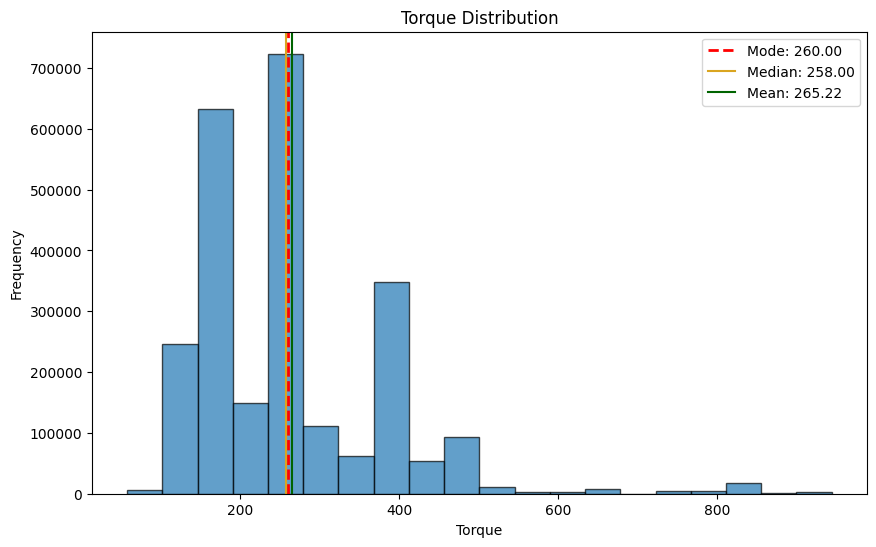

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Collecting the 'torque' column data from the Spark DataFrame into a Pandas DataFrame
torque_pd_df = df.select("torque").toPandas()

# Dropping null values (if any) for plotting purposes
torque_pd_df = torque_pd_df.dropna()

# Plotting the distribution
plt.figure(figsize=(10, 6))

# Plotting histogram
plt.hist(torque_pd_df['torque'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Torque Distribution')

# Adding mode,median and mode
mode = torque_pd_df['torque'].mode()[0]
plt.axvline(mode, color='r', linestyle='dashed', linewidth=2, label=f'Mode: {mode:.2f}')
median = torque_pd_df['torque'].median()
plt.axvline(median, color='goldenrod', label=f'Median: {median:.2f}')
mean = torque_pd_df['torque'].mean()
plt.axvline(mean, color='darkgreen', label=f'Mean: {mean:.2f}')


plt.legend()
plt.xlabel('Torque')
plt.ylabel('Frequency')


plt.show()
print("\n")

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'legroom' column before handling nulls
null_percentage_before = df.filter(F.col('torque').isNull()).count() / total_rows * 100
print(f"Null values in 'torque' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Calculating the mean of the 'torque' column
mean_torque = round(df.select(F.mean(F.col('torque'))).first()[0], 2)

# Filling null values in the 'torque' column with the calculated mean
df = df.fillna({'torque': mean_torque})

# Checking the result - Calculate the percentage of remaining null values
null_percentage = df.filter(F.col('torque').isNull()).count() / df.count() * 100

# Printing the result
print(f"Null values in 'torque' column AFTER handling (replacing null values with mean): {round(null_percentage, 3)} %.")


Null values in 'torque' column BEFORE handling: 17.26 %.
Null values in 'torque' column AFTER handling (replacing null values with mean): 0.0 %.


I chose to replace the missing values in the torque column with the mean (265.22) because the mean, median, and mode are closely aligned, indicating a roughly symmetric distribution. Using the mean helps preserve the overall structure of the data while preventing data loss. Since the distribution isn’t heavily skewed, mean imputation is an appropriate method that minimizes bias and ensures consistency across the dataset.

#### **Fuel Economy rows**

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values for each column
city_fuel_economy_null_percentage = df.filter(F.col("city_fuel_economy").isNull()).count() / total_rows * 100
highway_fuel_economy_null_percentage = df.filter(F.col("highway_fuel_economy").isNull()).count() / total_rows * 100
combined_fuel_economy_null_percentage = df.filter(F.col("combined_fuel_economy").isNull()).count() / total_rows * 100

# Printing the percentages rounded to 2 decimal places
print(f"Null values in 'city_fuel_economy' column BEFORE handling: {round(city_fuel_economy_null_percentage, 2)} %.")
print(f"Null values in 'highway_fuel_economy' column BEFORE handling: {round(highway_fuel_economy_null_percentage, 2)} %.")
print(f"Null values in 'combined_fuel_economy' column BEFORE handling: {round(combined_fuel_economy_null_percentage, 2)} %.")


Null values in 'city_fuel_economy' column BEFORE handling: 16.38 %.
Null values in 'highway_fuel_economy' column BEFORE handling: 16.38 %.
Null values in 'combined_fuel_economy' column BEFORE handling: 16.38 %.


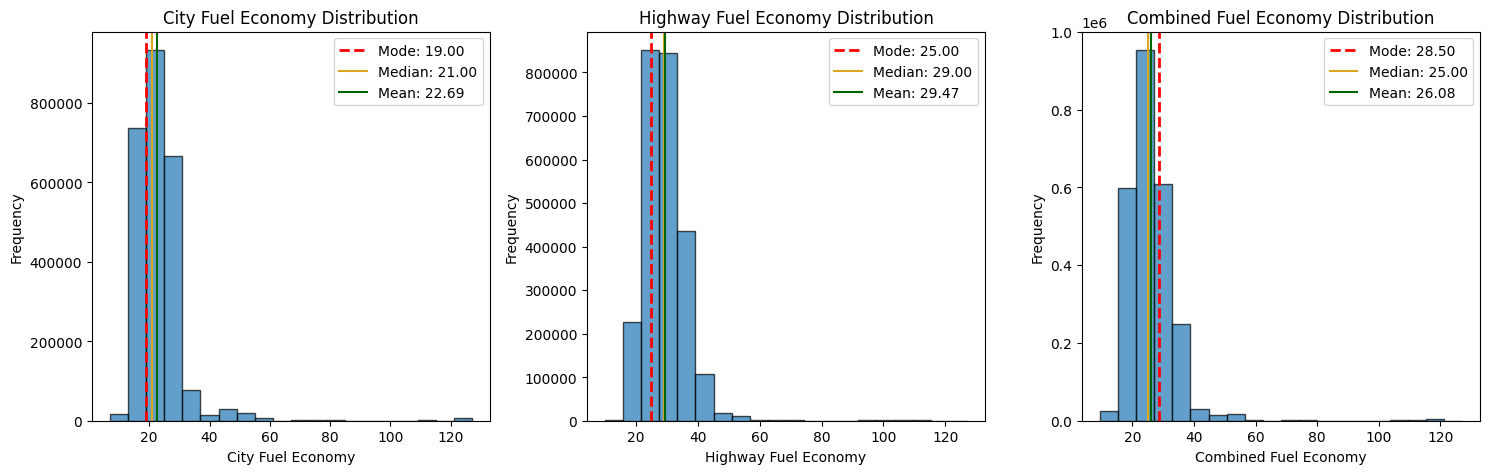

In [ ]:
import matplotlib.pyplot as plt

# Converting the relevant columns to a Pandas DataFrame
fuel_economy_pd_df = df.select("city_fuel_economy", "highway_fuel_economy", "combined_fuel_economy").toPandas()

# Dropping null values (if any)
fuel_economy_pd_df = fuel_economy_pd_df.dropna()

# Defining a function to plot the distribution for each column on subplots
def plot_fuel_economy_distributions(data):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

    # Titles for the charts
    titles = ["City Fuel Economy", "Highway Fuel Economy", "Combined Fuel Economy"]

    # Columns to plot
    columns = ["city_fuel_economy", "highway_fuel_economy", "combined_fuel_economy"]

    for i, col in enumerate(columns):
        axes[i].hist(data[col], bins=20, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'{titles[i]} Distribution')

        # Add mode,median and mean
        mode = data[col].mode()[0]
        axes[i].axvline(mode, color='r', linestyle='dashed', linewidth=2, label=f'Mode: {mode:.2f}')
        median = data[col].median()
        axes[i].axvline(median, color='goldenrod', label=f'Median: {median:.2f}')
        mean = data[col].mean()
        axes[i].axvline(mean, color='darkgreen', label=f'Mean: {mean:.2f}')

        # Add labels and legend
        axes[i].set_xlabel(titles[i])
        axes[i].set_ylabel('Frequency')
        axes[i].legend()

    # Adjust layout
    plt.tight_layout()
    plt.show()

# Plot all 3 distributions horizontally
plot_fuel_economy_distributions(fuel_economy_pd_df)

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the mean for each column
mean_city_fuel_economy = round(df.select(F.mean(F.col('city_fuel_economy'))).first()[0], 2)
mean_highway_fuel_economy = round(df.select(F.mean(F.col('highway_fuel_economy'))).first()[0], 2)
mean_combined_fuel_economy = round(df.select(F.mean(F.col('combined_fuel_economy'))).first()[0], 2)

# ing null values in each column with the respective mean value
df = df.fillna({
    'city_fuel_economy': mean_city_fuel_economy,
    'highway_fuel_economy': mean_highway_fuel_economy,
    'combined_fuel_economy': mean_combined_fuel_economy
})

print("After repalcing null values with mean...\n")

# Calculating the percentage of null values for each fuel economy column
city_fuel_economy_null_percentage = df.filter(F.col("city_fuel_economy").isNull()).count() / total_rows * 100
highway_fuel_economy_null_percentage = df.filter(F.col("highway_fuel_economy").isNull()).count() / total_rows * 100
combined_fuel_economy_null_percentage = df.filter(F.col("combined_fuel_economy").isNull()).count() / total_rows * 100

# Printing the result for each column, rounded to 2 decimal places
print(f"Null values in 'city_fuel_economy' column AFTER handling: {round(city_fuel_economy_null_percentage, 3)} %.")
print(f"Null values in 'highway_fuel_economy' column AFTER handling: {round(highway_fuel_economy_null_percentage, 3)} %.")
print(f"Null values in 'combined_fuel_economy' column AFTER handling: {round(combined_fuel_economy_null_percentage, 3)} %.")


After repalcing null values with mean...

Null values in 'city_fuel_economy' column AFTER handling: 0.0 %.
Null values in 'highway_fuel_economy' column AFTER handling: 0.0 %.
Null values in 'combined_fuel_economy' column AFTER handling: 0.0 %.


I chose to replace the missing values in the `city_fuel_economy`, `highway_fuel_economy`, and `combined_fuel_economy` columns with the **mean** because the mean provides a measure of central tendency that reflects the overall distribution of the data. While there is a slight skew in the distributions, the differences between the mean, median, and mode are minimal, indicating that the mean is still representative of the data. Using the mean ensures consistency across the dataset and is particularly suitable when all values, including potential outliers, need to be accounted for in the analysis.

#### **legroom**

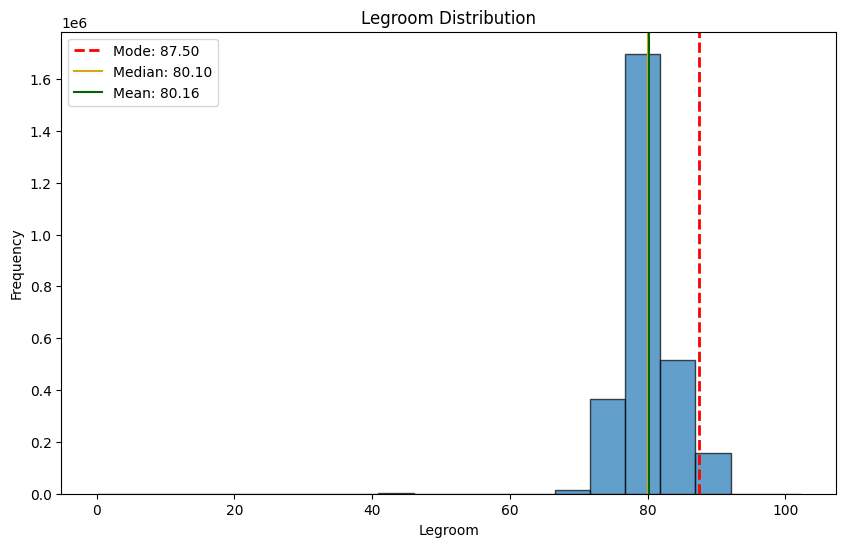

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Collecting the 'legroom' column data from the Spark DataFrame into a Pandas DataFrame
legroom_pd_df = df.select("legroom").toPandas()

# Dropping null values (if any) for plotting purposes
legroom_pd_df = legroom_pd_df.dropna()

# Plotting the distribution
plt.figure(figsize=(10, 6))

# Plotting histogram
plt.hist(legroom_pd_df['legroom'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Legroom Distribution')

# Adding mean,median and mode to the plot
mode = legroom_pd_df['legroom'].mode()[0]
plt.axvline(mode, color='r', linestyle='dashed', linewidth=2, label=f'Mode: {mode:.2f}')
median = legroom_pd_df['legroom'].median()
plt.axvline(median, color='goldenrod', label=f'Median: {median:.2f}')
mean = legroom_pd_df['legroom'].mean()
plt.axvline(mean, color='darkgreen', label=f'Mean: {mean:.2f}')

plt.legend()
plt.xlabel('Legroom')
plt.ylabel('Frequency')

plt.show()

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'legroom' column before handling nulls
null_percentage_before = df.filter(F.col('legroom').isNull()).count() / total_rows * 100
print(f"Null values in 'legroom' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Calculating the mean of the 'legroom' column
mean_legroom = round(df.select(F.mean(F.col('legroom'))).first()[0],2)

# Filling null values in the 'legroom' column with the calculated mean
df = df.fillna({'legroom': mean_legroom})

# Calculating the percentage of remaining null values in the 'legroom' column after filling
null_percentage_after = df.filter(F.col('legroom').isNull()).count() / total_rows * 100
print(f"Null values in 'legroom' column AFTER handling (replacing null values with mean): {round(null_percentage_after, 2)} %.")


Null values in 'legroom' column BEFORE handling: 8.09 %.
Null values in 'legroom' column AFTER handling (replacing null values with mean): 0.0 %.


#### **fuel_tank_volume**

In [ ]:
# Counting the number of unique 'fuel_tank_volume' values
unique_fuel_tank_volume_count = df.select("fuel_tank_volume").distinct().count()

print(f"The number of unique fuel_tank_volume values is: {unique_fuel_tank_volume_count}")


The number of unique fuel_tank_volume values is: 182


Given that the fuel tank size is measured in the fuel_tank_volume column, what about the fuel tank size of electric vehicles?

In [ ]:
# Filtering rows where 'fuel_type' is 'Electric' and select 'fuel_tank_volume' and 'fuel_type'
electric_fuel_tank_volume = df.filter(F.col("fuel_type") == "Electric") \
    .select("fuel_tank_volume", "fuel_type")

electric_fuel_tank_volume.show(truncate=False)


+----------------+---------+
|fuel_tank_volume|fuel_type|
+----------------+---------+
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
|NULL            |Electric |
+----------------+---------+
only showing top 20 rows



From the results,the fuel tank volume of the electric vehicles is null. We can fill in the null values with 0.

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql import DataFrame

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Filtering rows where 'fuel_type' is 'Electric' and 'fuel_tank_volume' is null, then updating 'fuel_tank_volume' to 0
df = df.withColumn(
    'fuel_tank_volume',
    F.when((F.col('fuel_type') == 'Electric') & F.col('fuel_tank_volume').isNull(), 0)
    .otherwise(F.col('fuel_tank_volume'))
)

# Calculating the percentage of remaining null values in 'fuel_tank_volume' after the update
null_percentage = df.filter(F.col('fuel_tank_volume').isNull()).count() / total_rows * 100

print(f"Null values in 'fuel_tank_volume' column (AFTER handling them for Electric cars): {round(null_percentage, 2)} %.")


Null values in 'fuel_tank_volume' column (AFTER handling them for Electric cars): 4.81 %.


We will `fill in the rest` of the null values with the `mean` value of the fuel tank volume.

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the mean 'fuel_tank_volume' for each 'fuel_type' and rounding to 2 decimal places
mean_fuel_tank_volume_by_type = df.groupBy("fuel_type").agg(F.round(F.mean("fuel_tank_volume"), 2).alias("mean_fuel_tank_volume"))

# Joining the mean back to the original DataFrame
df_with_mean = df.join(mean_fuel_tank_volume_by_type, on="fuel_type", how="left")

# Filling null values in 'fuel_tank_volume' with the respective mean based on 'fuel_type'
df = df_with_mean.withColumn(
    'fuel_tank_volume',
    F.when(F.col('fuel_tank_volume').isNull(), F.col('mean_fuel_tank_volume'))
    .otherwise(F.col('fuel_tank_volume'))
).drop('mean_fuel_tank_volume')  # Drop the extra column after filling

# Calculating the percentage of remaining null values in 'fuel_tank_volume' after filling
null_percentage = df.filter(F.col('fuel_tank_volume').isNull()).count() / total_rows * 100

print(f"Null values in 'fuel_tank_volume' column AFTER handling (replacing null values with mean of respective 'fuel_type'): {round(null_percentage, 2)} %.")


Null values in 'fuel_tank_volume' column AFTER handling (replacing null values with mean of respective 'fuel_type'): 1.67 %.


In [ ]:
from pyspark.sql import functions as F

# Calculating the mean 'fuel_tank_volume' for each 'fuel_type'
mean_fuel_tank_volume_by_type = df.groupBy("fuel_type").agg(F.mean("fuel_tank_volume").alias("mean_fuel_tank_volume"))

# Joining the mean back to the original DataFrame
df_with_mean = df.join(mean_fuel_tank_volume_by_type, on="fuel_type", how="left")

# Filling null values in 'fuel_tank_volume' with the respective mean based on 'fuel_type'
df = df_with_mean.withColumn(
    'fuel_tank_volume',
    F.when(F.col('fuel_tank_volume').isNull(), F.col('mean_fuel_tank_volume'))
    .otherwise(F.col('fuel_tank_volume'))
).drop('mean_fuel_tank_volume')  # Drop the extra column after filling

# Displaying rows where 'fuel_tank_volume' is still null, showing 'fuel_tank_volume' and 'fuel_type'
df.filter(F.col('fuel_tank_volume').isNull()).select("fuel_tank_volume", "fuel_type").show(truncate=False)


+----------------+---------+
|fuel_tank_volume|fuel_type|
+----------------+---------+
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
|NULL            |NULL     |
+----------------+---------+
only showing top 20 rows



**Looks like we have to handle null values in `fuel_type` first, before we handle them in `fuel_tank_volume`**



---



#### **fuel_type**

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Defining a window to compute the total count
window_spec = Window.rowsBetween(Window.unboundedPreceding, Window.unboundedFollowing)

# Grouping by 'fuel_type' and count the number of occurrences
fuel_type_counts = df.groupBy("fuel_type").count()

# Calculating the percentage representation of each fuel type and round the result to 2 decimal places
fuel_type_counts = fuel_type_counts.withColumn(
    "percentage",
    F.round((F.col("count") / F.sum("count").over(window_spec)) * 100, 2)
)

# Showing the unique fuel types and their representation (count and percentage)
fuel_type_counts.orderBy("count", ascending=False).show(truncate=False)


+----------------------+-------+----------+
|fuel_type             |count  |percentage|
+----------------------+-------+----------+
|Gasoline              |2598436|86.61     |
|Flex Fuel Vehicle     |155993 |5.2       |
|NULL                  |82724  |2.76      |
|Hybrid                |76012  |2.53      |
|Diesel                |44452  |1.48      |
|Biodiesel             |25855  |0.86      |
|Electric              |16416  |0.55      |
|Compressed Natural Gas|146    |0.0       |
|Propane               |6      |0.0       |
+----------------------+-------+----------+



In [ ]:
# Filtering rows where 'fuel_type' is null
null_fuel_type_rows = df.filter(F.col('fuel_type').isNull())

# Selecting the relevant columns ('fuel_type', 'fuel_tank_volume', 'engine_type', 'make_name', 'model_name')
null_fuel_type_rows.select("fuel_type", "fuel_tank_volume", "engine_type", "make_name", "model_name").show(truncate=False)


+---------+----------------+-----------+----------+------------------+
|fuel_type|fuel_tank_volume|engine_type|make_name |model_name        |
+---------+----------------+-----------+----------+------------------+
|NULL     |NULL            |NULL       |Ford      |Econoline Wagon   |
|NULL     |NULL            |NULL       |Nissan    |Frontier          |
|NULL     |31.0            |NULL       |GMC       |Yukon XL          |
|NULL     |21.5            |NULL       |Jeep      |Wrangler Unlimited|
|NULL     |13.2            |NULL       |Nissan    |Sentra            |
|NULL     |NULL            |NULL       |Subaru    |Ascent            |
|NULL     |NULL            |NULL       |Chevrolet |Corvette          |
|NULL     |26.0            |NULL       |Chevrolet |Silverado 1500    |
|NULL     |18.6            |NULL       |Ford      |Explorer          |
|NULL     |NULL            |NULL       |Subaru    |Outback           |
|NULL     |26.0            |NULL       |RAM       |1500              |
|NULL 

Majority Class Imputation: Since `Gasoline` is the most frequent fuel type, filling missing values with the most common category helps to maintain consistency in the dataset without introducing extreme bias.

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'fuel_type' column before handling nulls
null_percentage_before = df.filter(F.col('fuel_type').isNull()).count() / total_rows * 100
print(f"Null values in 'fuel_type' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Replacing NULL values in 'fuel_type' with 'Gasoline' where 'fuel_type' is NULL
df = df.withColumn(
    'fuel_type',
    F.when(F.col('fuel_type').isNull(), 'Gasoline')
    .otherwise(F.col('fuel_type'))
)

# Calculating the percentage of remaining null values in the 'fuel_type' column after filling
null_percentage_after = df.filter(F.col('fuel_type').isNull()).count() / total_rows * 100
print(f"Null values in 'fuel_type' column AFTER handling: {round(null_percentage_after, 2)} %.")


Null values in 'fuel_type' column BEFORE handling: 2.76 %.
Null values in 'fuel_type' column AFTER handling: 0.0 %.




---



Now that the missing values in the `fuel_type` column have been successfully filled, let's revisit the `fuel_tank_volume` column to determine if we can address the remaining null values and fill them in appropriately.

In [ ]:
from pyspark.sql import functions as F

# Displaying rows where 'fuel_tank_volume' is NULL along with 'fuel_type'
null_fuel_tank_volume_rows = df.filter(F.col('fuel_tank_volume').isNull()) \
    .select('fuel_tank_volume', 'fuel_type')

null_fuel_tank_volume_rows.show(truncate=False)


+----------------+---------+
|fuel_tank_volume|fuel_type|
+----------------+---------+
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
|NULL            |Gasoline |
+----------------+---------+
only showing top 20 rows



In [ ]:
# Calculating the mean 'fuel_tank_volume' for each 'fuel_type' and collect the results
mean_fuel_tank_volume_by_type = df.groupBy("fuel_type").agg(F.mean("fuel_tank_volume").alias("mean_fuel_tank_volume")).collect()

# Converting the results to a dictionary for easy lookup and round the values to two decimal places
mean_fuel_tank_volume_dict = {row['fuel_type']: round(row['mean_fuel_tank_volume'], 2) for row in mean_fuel_tank_volume_by_type}
print(mean_fuel_tank_volume_dict)


{'Biodiesel': 37.07, 'Gasoline': 18.09, 'Diesel': 27.86, 'Flex Fuel Vehicle': 24.74, 'Hybrid': 13.55, 'Propane': 25.83, 'Electric': 0.0, 'Compressed Natural Gas': 23.92}


In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

# Defining a UDF to get the mean fuel tank volume based on 'fuel_type'
def get_mean_fuel_tank_volume(fuel_type, fuel_tank_volume):
    if fuel_tank_volume is None and fuel_type in mean_fuel_tank_volume_dict:
        return mean_fuel_tank_volume_dict[fuel_type]
    else:
        return fuel_tank_volume

# Registering the UDF in Spark
get_mean_fuel_tank_volume_udf = udf(get_mean_fuel_tank_volume, FloatType())

# Applying the UDF to fill null values in 'fuel_tank_volume'
df = df.withColumn(
    'fuel_tank_volume',
    get_mean_fuel_tank_volume_udf(F.col('fuel_type'), F.col('fuel_tank_volume'))
)


In [ ]:
# Calculating the percentage of remaining null values in 'fuel_tank_volume' after filling
null_percentage_after = df.filter(F.col('fuel_tank_volume').isNull()).count() / total_rows * 100

print(f"Null values in 'fuel_tank_volume' column AFTER handling (replacing null values with mean of the respective engine type): {round(null_percentage_after, 2)} %.")


Null values in 'fuel_tank_volume' column AFTER handling (replacing null values with mean of the respective engine type): 0.0 %.




---



#### **engine_type**

In [ ]:
from pyspark.sql import functions as F

# Filtering rows where 'engine_type' is NULL
null_engine_type_rows = df.filter(F.col('engine_type').isNull())
random_sample_null_engine_type_rows = null_engine_type_rows.sample(fraction=0.1)

# Selecting specific columns for display
random_sample_null_engine_type_rows.select("make_name", "model_name", "engine_type", "fuel_type").show(truncate=False)


+---------+--------------+-----------+---------+
|make_name|model_name    |engine_type|fuel_type|
+---------+--------------+-----------+---------+
|Jeep     |Gladiator     |NULL       |Gasoline |
|RAM      |1500          |NULL       |Gasoline |
|Dodge    |RAM 2500      |NULL       |Gasoline |
|Nissan   |Sentra        |NULL       |Gasoline |
|BMW      |X3            |NULL       |Gasoline |
|BMW      |X5            |NULL       |Gasoline |
|Chevrolet|Bolt EV       |NULL       |Electric |
|Ford     |Model T       |NULL       |Gasoline |
|Nissan   |Frontier      |NULL       |Gasoline |
|BMW      |X5            |NULL       |Gasoline |
|Jeep     |Wrangler      |NULL       |Gasoline |
|Nissan   |Frontier      |NULL       |Gasoline |
|RAM      |1500          |NULL       |Gasoline |
|Nissan   |LEAF          |NULL       |Electric |
|Chevrolet|Silverado 1500|NULL       |Gasoline |
|Chevrolet|Silverado 1500|NULL       |Gasoline |
|BMW      |5 Series      |NULL       |Gasoline |
|Ford     |Explorer 

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'engine_type' column before handling nulls
null_percentage_before = df.filter(F.col('engine_type').isNull()).count() / total_rows * 100
print(f"Null values in 'engine_type' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Filling 'engine_type' with specific values based on 'fuel_type'
df = df.withColumn(
    'engine_type',
    F.when((F.col('engine_type').isNull()) & (F.col('fuel_type') == "Electric"), "Electric Motor")
    .when((F.col('engine_type').isNull()) & (F.col('fuel_type') == "Gasoline"), "Gasoline engine")
    .when((F.col('engine_type').isNull()) & (F.col('fuel_type') == "Diesel"), "Diesel engine")
    .otherwise(F.col('engine_type'))  # Keep existing values where conditions don't apply
)

# Calculating the percentage of remaining null values in the 'engine_type' column after filling
null_percentage_after = df.filter(F.col('engine_type').isNull()).count() / total_rows * 100
print(f"Null values in 'engine_type' column AFTER handling: {round(null_percentage_after, 2)} %.")

Null values in 'engine_type' column BEFORE handling: 3.35 %.
Null values in 'engine_type' column AFTER handling: 0.0 %.


In this approach, instead of replacing the null values in the `engine_type` column with a generic "Unknown," we are imputing them based on the corresponding `fuel_type`. This method provides more meaningful and accurate data, as it assigns specific engine types such as "Electric Motor," "Gasoline engine," and "Diesel engine" where applicable, reducing the loss of information and ensuring consistency in the dataset.

#### **height**

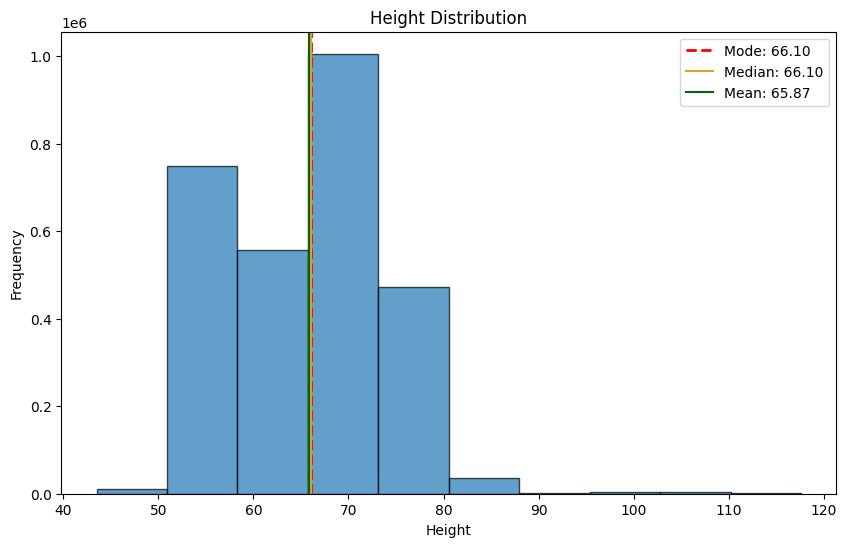

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Collecting the 'height' column as a Pandas DataFrame
height_pd_df = df.select('height').toPandas()

# Dropping null values for accurate plotting
height_pd_df = height_pd_df.dropna()

# Calculating mode, median, and mean
mode_height = height_pd_df['height'].mode()[0]
median_height = height_pd_df['height'].median()
mean_height = height_pd_df['height'].mean()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(height_pd_df['height'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Height Distribution")

# Adding mean,median and mode to the plot
plt.axvline(mode_height, color='r', linestyle='dashed', linewidth=2, label=f'Mode: {mode_height:.2f}')
plt.axvline(median_height, color='goldenrod', label=f'Median: {median_height:.2f}')
plt.axvline(mean_height, color='darkgreen', label=f'Mean: {mean_height:.2f}')

# Add legend and Label axes
plt.legend()
plt.xlabel('Height')
plt.ylabel('Frequency')


plt.show()

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'height' column before handling nulls
null_percentage_before = df.filter(F.col('height').isNull()).count() / total_rows * 100
print(f"Null values in 'height' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Calculating the mean value of the 'height' column
mean_height = round(df.select(F.mean(F.col('height'))).first()[0], 2)

# Filling null values in 'height' with the calculated mean
df = df.fillna({'height': mean_height})

# Calculating the percentage of remaining null values in the 'height' column after filling
null_percentage_after = df.filter(F.col('height').isNull()).count() / total_rows * 100
print(f"Null values in 'height' column AFTER handling (replacing null values with mean): {round(null_percentage_after, 2)} %.")


Null values in 'height' column BEFORE handling: 5.32 %.
Null values in 'height' column AFTER handling (replacing null values with mean): 0.0 %.


We compute the mean value of the `height` column and use it to fill in the missing values. Since the distribution of height is relatively symmetrical, using the `mean` ensures that the overall structure of the data is maintained.

#### **Length**

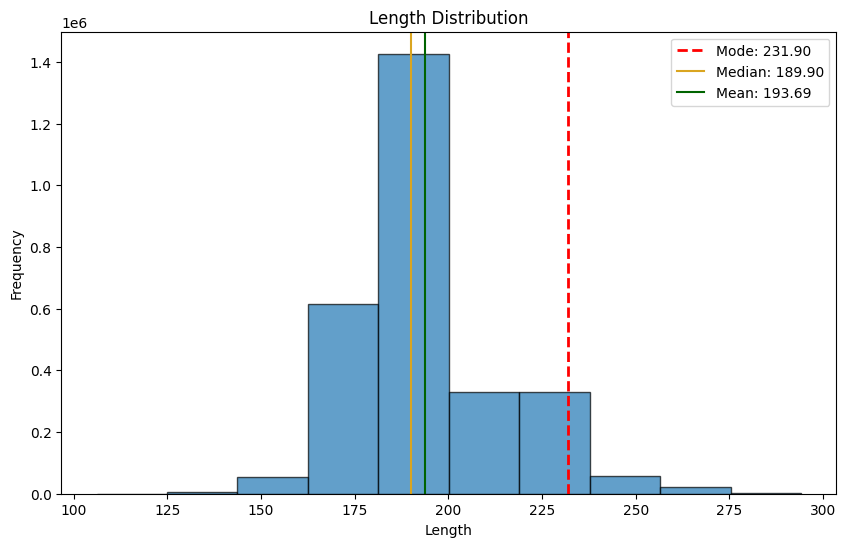

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Collecting the 'length' column as a Pandas DataFrame
length_pd_df = df.select('length').toPandas()

# Dropping null values for accurate plotting
length_pd_df = length_pd_df.dropna()

# Calculating mode, median, and mean
mode_length = length_pd_df['length'].mode()[0]
median_length = length_pd_df['length'].median()
mean_length = length_pd_df['length'].mean()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(length_pd_df['length'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Length Distribution")

# Adding mean,median and mode to the plot
plt.axvline(mode_length, color='r', linestyle='dashed', linewidth=2, label=f'Mode: {mode_length:.2f}')
plt.axvline(median_length, color='goldenrod', label=f'Median: {median_length:.2f}')
plt.axvline(mean_length, color='darkgreen', label=f'Mean: {mean_length:.2f}')

# Adding legend & Labeling the  axes
plt.legend()
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.show()

Since the distribution seems slightly skewed and the mode is significantly higher than both the median and mean, using the `median` is the best option. It is more robust to outliers and represents the central tendency of the majority of the data. This approach avoids any distortion from outliers or skewed data points while still maintaining the overall distribution.

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'length' column before handling nulls
null_percentage_before = df.filter(F.col('length').isNull()).count() / total_rows * 100
print(f"Null values in 'length' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Calculating the median value of the 'length' column using approxQuantile
median_length = df.approxQuantile("length", [0.5], 0.01)[0]  # Using 0.01 precision

# Filling null values in 'length' with the calculated median
df = df.fillna({'length': median_length})

# Calculating the percentage of remaining null values in the 'length' column after filling
null_percentage_after = df.filter(F.col('length').isNull()).count() / total_rows * 100
print(f"Null values in 'length' column AFTER handling (replacing null values with median): {round(null_percentage_after, 2)} %.")


Null values in 'length' column BEFORE handling: 5.32 %.
Null values in 'length' column AFTER handling (replacing null values with median): 0.0 %.


#### **width**

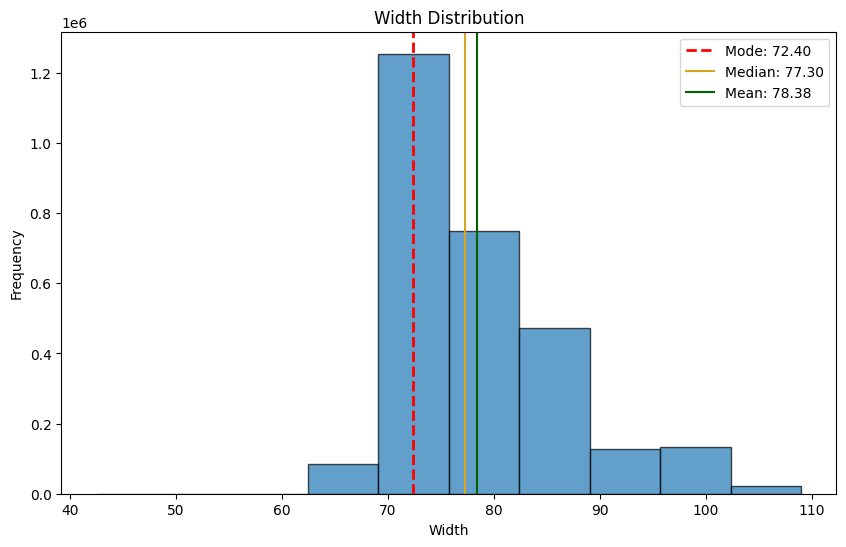

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Collecting the 'width' column as a Pandas DataFrame
width_pd_df = df.select('width').toPandas()

# Dropping null values for accurate plotting
width_pd_df = width_pd_df.dropna()

# Calculating mode, median, and mean
mode_width = width_pd_df['width'].mode()[0]
median_width = width_pd_df['width'].median()
mean_width = width_pd_df['width'].mean()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(width_pd_df['width'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Width Distribution")

# Adding mean,median and mode to the plot
plt.axvline(mode_width, color='r', linestyle='dashed', linewidth=2, label=f'Mode: {mode_width:.2f}')
plt.axvline(median_width, color='goldenrod', label=f'Median: {median_width:.2f}')
plt.axvline(mean_width, color='darkgreen', label=f'Mean: {mean_width:.2f}')

# Adding a legend and Labeling the axes
plt.legend()
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.show()

Using the `median` (77.30) to fill null values in the width column is an optimal choice because it accurately reflects the central point of the dataset without being affected by outliers or skewed data. This approach maintains data integrity by preventing any bias that might result from using other measures like the mean.

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'width' column before handling nulls
null_percentage_before = df.filter(F.col('width').isNull()).count() / total_rows * 100
print(f"Null values in 'width' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Calculating the median value of the 'width' column using approxQuantile
median_width = df.approxQuantile("width", [0.5], 0.01)[0]  # Using 0.01 precision

# Filling null values in 'width' with the calculated median
df = df.fillna({'width': median_width})

# Calculating the percentage of remaining null values in the 'width' column after filling
null_percentage_after = df.filter(F.col('width').isNull()).count() / total_rows * 100
print(f"Null values in 'width' column AFTER handling (replacing null values with median): {round(null_percentage_after, 2)} %.")


Null values in 'width' column BEFORE handling: 5.32 %.
Null values in 'width' column AFTER handling (replacing null values with median): 0.0 %.


#### **horsepower**

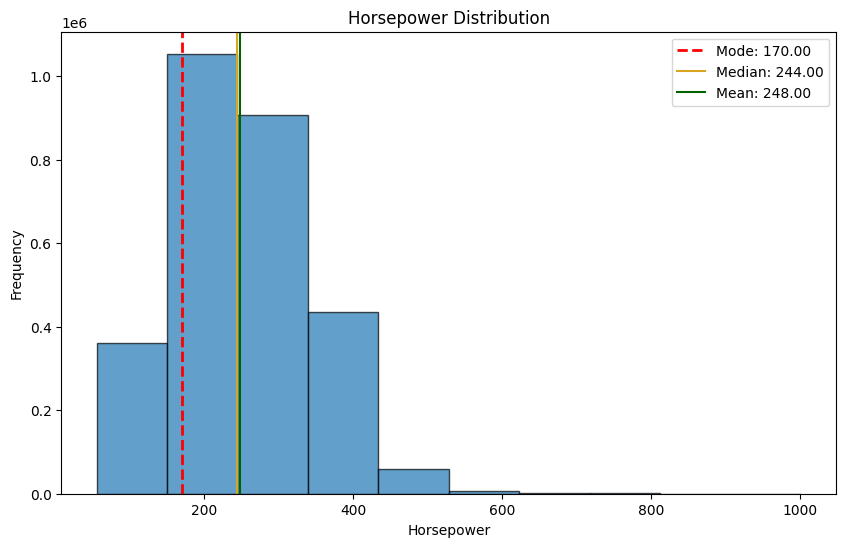

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Collecting the 'horsepower' column as a Pandas DataFrame
horsepower_pd_df = df.select('horsepower').toPandas()

# Dropping null values for accurate plotting
horsepower_pd_df = horsepower_pd_df.dropna()

# Calculating mode, median, and mean
mode_horsepower = horsepower_pd_df['horsepower'].mode()[0]
median_horsepower = horsepower_pd_df['horsepower'].median()
mean_horsepower = horsepower_pd_df['horsepower'].mean()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(horsepower_pd_df['horsepower'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Horsepower Distribution")

# Adding mean,median and mode to the plot
plt.axvline(mode_horsepower, color='r', linestyle='dashed', linewidth=2, label=f'Mode: {mode_horsepower:.2f}')
plt.axvline(median_horsepower, color='goldenrod', label=f'Median: {median_horsepower:.2f}')
plt.axvline(mean_horsepower, color='darkgreen', label=f'Mean: {mean_horsepower:.2f}')

# Adding legend & Labeling the  axes
plt.legend()
plt.xlabel('Horsepower')
plt.ylabel('Frequency')

plt.show()

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Counting of rows where 'horsepower' is 170
count_170_hp = df.filter(F.col('horsepower') == 170).count()

# Calculating the percentage
percentage_170_hp = (count_170_hp / total_rows) * 100

print(f"Percentage of cars with 170 horsepower: {round(percentage_170_hp, 2)}%")

Percentage of cars with 170 horsepower: 4.03%


Since the **mode (170 HP)** is not very dominant (only 4.03%), and both the **median (244 HP)** and **mean (248 HP)** are more representative of the central tendency, it would be better to replace the null values with the **`median` (244 HP)**.

This would provide a more accurate reflection of the typical car in my dataset, especially given the balance between higher and lower horsepower values.

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'horsepower' column before handling nulls
null_percentage_before = df.filter(F.col('horsepower').isNull()).count() / total_rows * 100
print(f"Null values in 'horsepower' column BEFORE handling: {round(null_percentage_before, 2)} % .")

# Calculating the median value of the 'horsepower' column using approxQuantile
median_horsepower = df.approxQuantile("horsepower", [0.5], 0.01)[0]  # Using 0.01 precision

# Filling null values in 'horsepower' with the calculated median
df = df.fillna({'horsepower': median_horsepower})

# Calculating the percentage of remaining null values in the 'horsepower' column after filling
null_percentage_after = df.filter(F.col('horsepower').isNull()).count() / total_rows * 100
print(f"Null values in 'horsepower' column AFTER handling (replacing null values with median): {round(null_percentage_after, 2)} % .")

Null values in 'horsepower' column BEFORE handling: 5.75 % .
Null values in 'horsepower' column AFTER handling (replacing null values with median): 0.0 % .


#### **mileage**

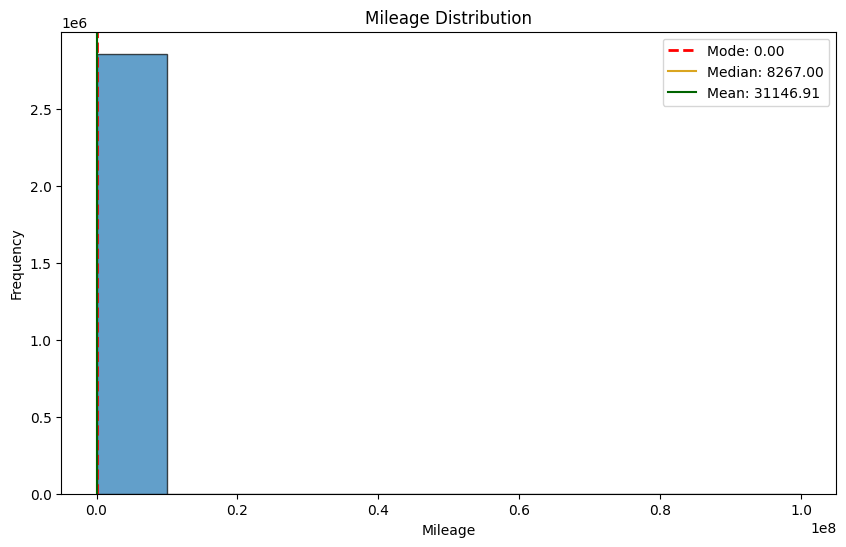

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Collecting the 'mileage' column as a Pandas DataFrame
mileage_pd_df = df.select('mileage').toPandas()

# Dropping null values for accurate plotting
mileage_pd_df = mileage_pd_df.dropna()

# Calculating mode, median, and mean
mode_mileage = mileage_pd_df['mileage'].mode()[0]
median_mileage = mileage_pd_df['mileage'].median()
mean_mileage = mileage_pd_df['mileage'].mean()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(mileage_pd_df['mileage'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Mileage Distribution")

# Adding mean,median and mode to the plot
plt.axvline(mode_mileage, color='r', linestyle='dashed', linewidth=2, label=f'Mode: {mode_mileage:.2f}')
plt.axvline(median_mileage, color='goldenrod', label=f'Median: {median_mileage:.2f}')
plt.axvline(mean_mileage, color='darkgreen', label=f'Mean: {mean_mileage:.2f}')

# Adding legend & Labeling the  axes
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')

plt.show()

The histogram shows the distribution of the **mileage** column, with a large concentration of values near **0**, as evidenced by the mode being exactly **0.00**. This suggests a significant proportion of vehicles in the dataset have low or no mileage recorded, which might indicate new or low-used cars, or potentially missing data. The **median** mileage is **8267.00**, meaning half of the vehicles have mileage below this point. The **mean** mileage, at **31146.91**, is significantly higher than the median, indicating the presence of high-mileage outliers that are skewing the mean upwards. This suggests that the dataset contains a few cars with very high mileage, which could distort some analyses if not handled properly. Removing outliers or transforming the data (like with a `log transformation`) could be useful steps for more balanced analysis.

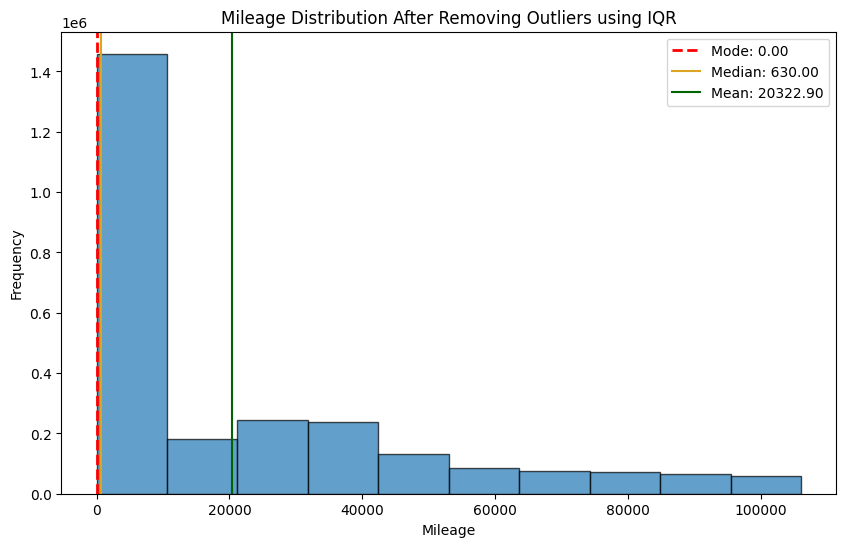

In [ ]:
from pyspark.sql import functions as F

# Calculating Q1 (25th percentile) and Q3 (75th percentile)
q1, q3 = df.approxQuantile("mileage", [0.25, 0.75], 0.01)

# Calculating IQR
iqr = q3 - q1

# Defining Lower and Upper Bound
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filtering the DataFrame to remove outliers
df_no_outliers = df.filter((F.col('mileage') >= lower_bound) & (F.col('mileage') <= upper_bound))

# Collecting the 'mileage' column without outliers as a Pandas DataFrame
mileage_no_outliers_pd_df = df_no_outliers.select('mileage').toPandas()

# Dropping null values for accurate plotting
mileage_no_outliers_pd_df = mileage_no_outliers_pd_df.dropna()

# Calculating mode, median, and mean
mode_mileage = mileage_no_outliers_pd_df['mileage'].mode()[0]
median_mileage = mileage_no_outliers_pd_df['mileage'].median()
mean_mileage = mileage_no_outliers_pd_df['mileage'].mean()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(mileage_no_outliers_pd_df['mileage'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Mileage Distribution After Removing Outliers using IQR")

# Adding mean,median and mode to the plot
plt.axvline(mode_mileage, color='r', linestyle='dashed', linewidth=2, label=f'Mode: {mode_mileage:.2f}')
plt.axvline(median_mileage, color='goldenrod', label=f'Median: {median_mileage:.2f}')
plt.axvline(mean_mileage, color='darkgreen', label=f'Mean: {mean_mileage:.2f}')

# Adding legend & Labeling the  axes
plt.legend()
plt.xlabel('Mileage')
plt.ylabel('Frequency')

plt.show()

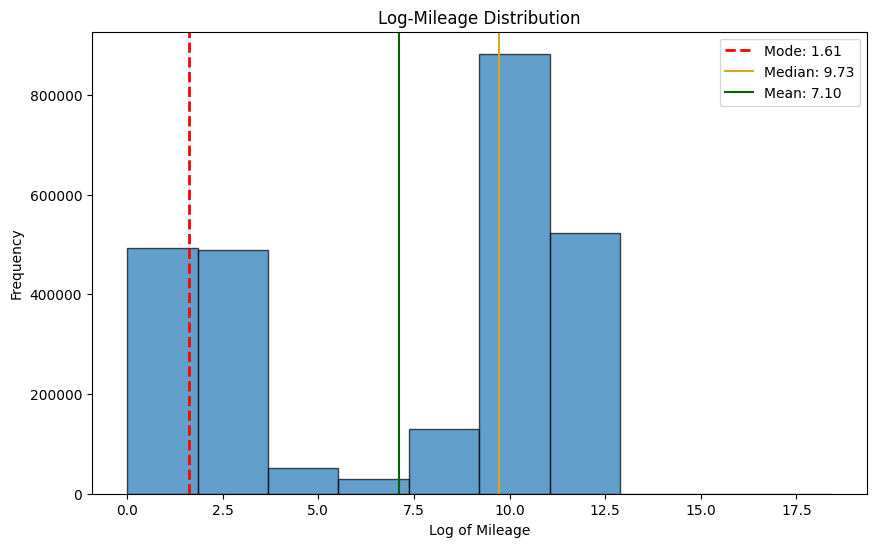

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Applying log transformation to the mileage column
df_transformed = df.withColumn('log_mileage', F.log(F.col('mileage')))

# Collecting the transformed mileage data into a Pandas DataFrame for visualization
log_mileage_pd_df = df_transformed.select('log_mileage').toPandas()

# Calculating the mode, median, and mean of the log-transformed mileage
mode_log_mileage = log_mileage_pd_df['log_mileage'].mode()[0]
median_log_mileage = log_mileage_pd_df['log_mileage'].median()
mean_log_mileage = log_mileage_pd_df['log_mileage'].mean()

# Plotting the histogram of the log-transformed mileage data
plt.figure(figsize=(10, 6))
plt.hist(log_mileage_pd_df['log_mileage'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Log-Mileage Distribution")

# Adding mean,median and mode to the plot
plt.axvline(mode_log_mileage, color='r', linestyle='dashed', linewidth=2, label=f'Mode: {mode_log_mileage:.2f}')
plt.axvline(median_log_mileage, color='goldenrod', label=f'Median: {median_log_mileage:.2f}')
plt.axvline(mean_log_mileage, color='darkgreen', label=f'Mean: {mean_log_mileage:.2f}')

# Adding legend & Labeling the  axes
plt.legend()
plt.xlabel("Log of Mileage")
plt.ylabel("Frequency")

plt.show()


In this case, the log transformation seems to provide a more normalized and less skewed distribution compared to the original data after the IQR . The log transformation compresses the scale and allows the data to be distributed more evenly, while the IQR method removes outliers but does not address the underlying skew in the dataset.

Therefore, the log transformation appears to be a better method for making the mileage data more normally distributed and suitable for further analysis.

**Handling null values : replacing with median**

Using the `median` to replace null values in my mileage data is advantageous because it is robust to outliers, unlike the mean, which can be skewed by extreme values. The median represents the middle value, providing a better representation of a "typical" mileage for the majority of vehicles in my dataset. This makes it a more stable measure of central tendency, especially in a skewed distribution with many low or zero values. Additionally, the median is simple to calculate and interpret, making it an intuitive choice for analysis.  I am not using the mean (31146.91) ro fill nall values, as it may be skewed by high-mileage outliers.

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'mileage' column before handling nulls
null_percentage_before = df.filter(F.col('mileage').isNull()).count() / total_rows * 100
print(f"Null values in 'mileage' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Calculating the median value of the 'mileage' column using approxQuantile
median_mileage = df.approxQuantile("mileage", [0.5], 0.01)[0]  # Using 0.01 precision

# Filling null values in 'mileage' with the calculated median
df = df.fillna({'mileage': median_mileage})

# Calculating the percentage of remaining null values in the 'mileage' column after filling
null_percentage_after = df.filter(F.col('mileage').isNull()).count() / total_rows * 100
print(f"Null values in 'mileage' column AFTER handling (replacing null values with median): {round(null_percentage_after, 2)} %.")


Null values in 'mileage' column BEFORE handling: 4.81 %.
Null values in 'mileage' column AFTER handling (replacing null values with median): 0.0 %.


**Adding log_mileage**

In [ ]:
# Checking for zero or negative values in the 'mileage' column
zero_or_negative_count = df.filter(F.col('mileage') <= 0).count()
print(f"Zero or negative values in 'mileage': {zero_or_negative_count}")

Zero or negative values in 'mileage': 256899


In [ ]:
# imputing zero or negative values with the median mileage before applying the log transformation, ensuring that they are valid for log calculation.
median_mileage = df.approxQuantile("mileage", [0.5], 0.01)[0]
df = df.withColumn('mileage', F.when(F.col('mileage') <= 0, median_mileage).otherwise(F.col('mileage')))

Imputing zero or negative values in the `mileage` column before applying the log transformation is essential because the logarithm of such values is undefined, leading to null results. By replacing these values with the `median` mileage, I ensure that all entries are positive and valid for the log calculation. This approach maintains data integrity and prevents the introduction of null entries in the `log_mileage` column, allowing for accurate analysis and modeling.

If I dont impute zero or negative values with median, I might get null values after log transformation, which I dont want

In [ ]:
from pyspark.sql import functions as F

# Logging transform the 'mileage' column and add it to the DataFrame, rounding to 2 decimal places
df = df.withColumn('log_mileage', F.round(F.log(F.col('mileage')), 2))

# Selecting to show only 'mileage' and 'log_mileage'
df.orderBy(F.rand()).select('mileage', 'log_mileage').show()


+--------+-----------+
| mileage|log_mileage|
+--------+-----------+
| 37400.0|      10.53|
|     6.0|       1.79|
| 30168.0|      10.31|
|    15.0|       2.71|
|127267.0|      11.75|
|  7407.0|       8.91|
| 98000.0|      11.49|
|  7407.0|       8.91|
| 29872.0|       10.3|
|     4.0|       1.39|
|148782.0|      11.91|
| 55801.0|      10.93|
|  7407.0|       8.91|
| 72028.0|      11.18|
| 13309.0|        9.5|
|131767.0|      11.79|
|  7407.0|       8.91|
|  7407.0|       8.91|
|    10.0|        2.3|
|     5.0|       1.61|
+--------+-----------+
only showing top 20 rows



In [ ]:
from pyspark.sql import functions as F

# Checking for null values in the 'log_mileage' column
null_count = df.filter(F.col('log_mileage').isNull()).count()
print(f"Null values in 'log_mileage': {null_count}")

# Calculating mean, median, and mode for 'log_mileage'
mean_log_mileage = df.select(F.mean('log_mileage')).collect()[0][0]
median_log_mileage = df.approxQuantile("log_mileage", [0.5], 0.01)[0]  # Using approxQuantile for median
mode_log_mileage = df.groupBy('log_mileage').count().orderBy(F.desc('count')).first()[0]

print(f"\nMean of log_mileage: {mean_log_mileage}")
print(f"Median of log_mileage: {median_log_mileage}")
print(f"Mode of log_mileage: {mode_log_mileage}")

Null values in 'log_mileage': 0

Mean of log_mileage: 7.339374461674072
Median of log_mileage: 8.91
Mode of log_mileage: 8.91


#### **wheelbase**

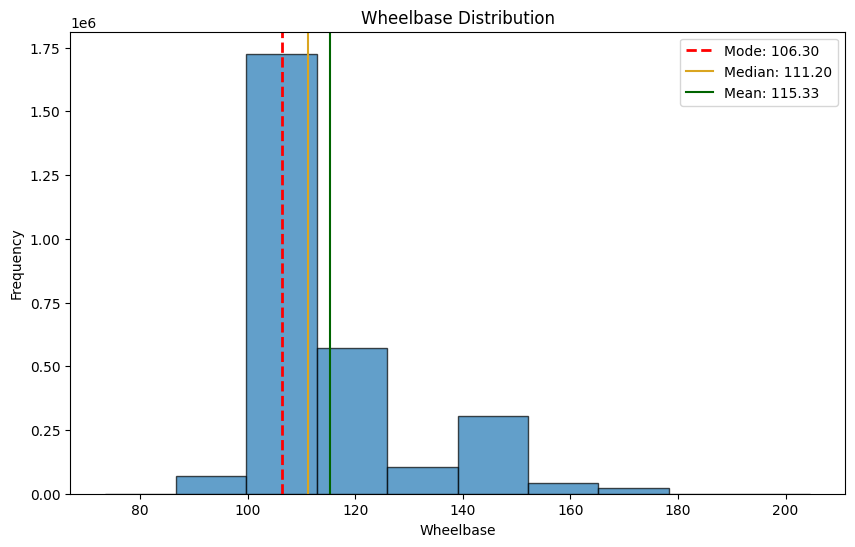

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Collecting the 'wheelbase' column as a Pandas DataFrame
wheelbase_pd_df = df.select('wheelbase').toPandas()

# Dropping null values for accurate plotting
wheelbase_pd_df = wheelbase_pd_df.dropna()

# Calculating mode, median, and mean
mode_wheelbase = wheelbase_pd_df['wheelbase'].mode()[0]
median_wheelbase = wheelbase_pd_df['wheelbase'].median()
mean_wheelbase = wheelbase_pd_df['wheelbase'].mean()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(wheelbase_pd_df['wheelbase'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Wheelbase Distribution")

# Adding mean,median and mode to the plot
plt.axvline(mode_wheelbase, color='r', linestyle='dashed', linewidth=2, label=f'Mode: {mode_wheelbase:.2f}')
plt.axvline(median_wheelbase, color='goldenrod', label=f'Median: {median_wheelbase:.2f}')
plt.axvline(mean_wheelbase, color='darkgreen', label=f'Mean: {mean_wheelbase:.2f}')

# Adding legend & Labeling the  axes
plt.legend()
plt.xlabel('Wheelbase')
plt.ylabel('Frequency')

plt.show()

In this case, the distribution of the `wheelbase` data appears to be right-skewed, with a long tail towards higher values. The mean is more influenced by the extreme values in the tail, while the median better represents the central tendency of the majority of the data, especially given the skewness. Therefore, `replacing null values with the median` is a more robust approach since it is less affected by outliers compared to the mean.

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'wheelbase' column BEFORE handling nulls
null_percentage_before = df.filter(F.col('wheelbase').isNull()).count() / total_rows * 100
print(f"Null values in 'wheelbase' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Calculating the median value of the 'wheelbase' column using approxQuantile
median_wheelbase = df.approxQuantile("wheelbase", [0.5], 0.01)[0]  # Using 0.01 precision for median

# Filling null values in 'wheelbase' with the calculated median
df = df.fillna({'wheelbase': median_wheelbase})

# Calculating the percentage of remaining null values in the 'wheelbase' column AFTER filling
null_percentage_after = df.filter(F.col('wheelbase').isNull()).count() / total_rows * 100
print(f"Null values in 'wheelbase' column AFTER handling (replacing null values with median): {round(null_percentage_after, 2)} %.")


Null values in 'wheelbase' column BEFORE handling: 5.32 %.
Null values in 'wheelbase' column AFTER handling (replacing null values with median): 0.0 %.


#### **maximum_seating**

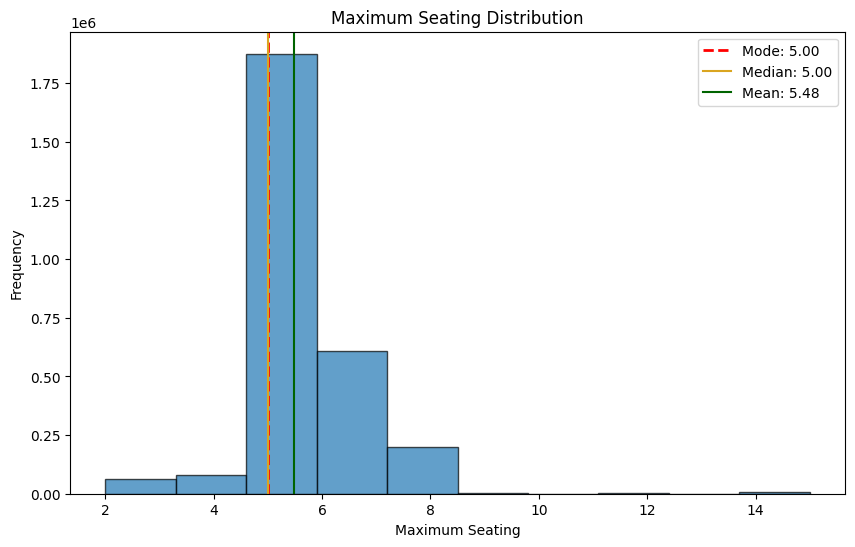

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Converting the column 'maximum_seating' from Spark DataFrame to Pandas
max_seating_pd_df = df.select('maximum_seating').toPandas()

# Dropping null values for accurate plotting
max_seating_pd_df = max_seating_pd_df.dropna()

# Calculating mode, median, and mean
mode_max_seating = max_seating_pd_df['maximum_seating'].mode()[0]
median_max_seating = max_seating_pd_df['maximum_seating'].median()
mean_max_seating = max_seating_pd_df['maximum_seating'].mean()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(max_seating_pd_df['maximum_seating'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Maximum Seating Distribution")

# Adding mean,median and mode to the plot
plt.axvline(mode_max_seating, color='r', linestyle='dashed', linewidth=2, label=f'Mode: {mode_max_seating:.2f}')
plt.axvline(median_max_seating, color='goldenrod', label=f'Median: {median_max_seating:.2f}')
plt.axvline(mean_max_seating, color='darkgreen', label=f'Mean: {mean_max_seating:.2f}')

# Adding legend & Labeling the  axes
plt.legend()
plt.xlabel('Maximum Seating')
plt.ylabel('Frequency')


plt.show()

In [ ]:
# Grouping by 'maximum_seating' and count the occurrences
df.groupBy('maximum_seating').count().orderBy('count', ascending=False).show()

+---------------+-------+
|maximum_seating|  count|
+---------------+-------+
|            5.0|1875357|
|            7.0| 305330|
|            6.0| 301485|
|            8.0| 200360|
|           NULL| 159770|
|            4.0|  81174|
|            2.0|  35105|
|            3.0|  29676|
|           15.0|   5906|
|            9.0|   3634|
|           12.0|   1703|
|           10.0|    540|
+---------------+-------+



Replacing null values in the `maximum_seating` column with '5 seats' is justified because 5 seats is the industry standard for most modern cars. This approach minimizes bias and preserves the overall data distribution without complicating the imputation process. It is a practical solution that aligns with common car configurations, ensuring that the dataset remains representative.

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'maximum_seating' column BEFORE handling nulls
null_percentage_before = df.filter(F.col('maximum_seating').isNull()).count() / total_rows * 100
print(f"Null values in 'maximum_seating' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Filling null values in 'maximum_seating' with the value '5'
df = df.fillna({'maximum_seating': 5})

# Calculating the percentage of remaining null values in the 'maximum_seating' column AFTER filling
null_percentage_after = df.filter(F.col('maximum_seating').isNull()).count() / total_rows * 100
print(f"Null values in 'maximum_seating' column AFTER handling (replacing null values with 5): {round(null_percentage_after, 2)} %.")


Null values in 'maximum_seating' column BEFORE handling: 5.33 %.
Null values in 'maximum_seating' column AFTER handling (replacing null values with 5): 0.0 %.


#### **rating**

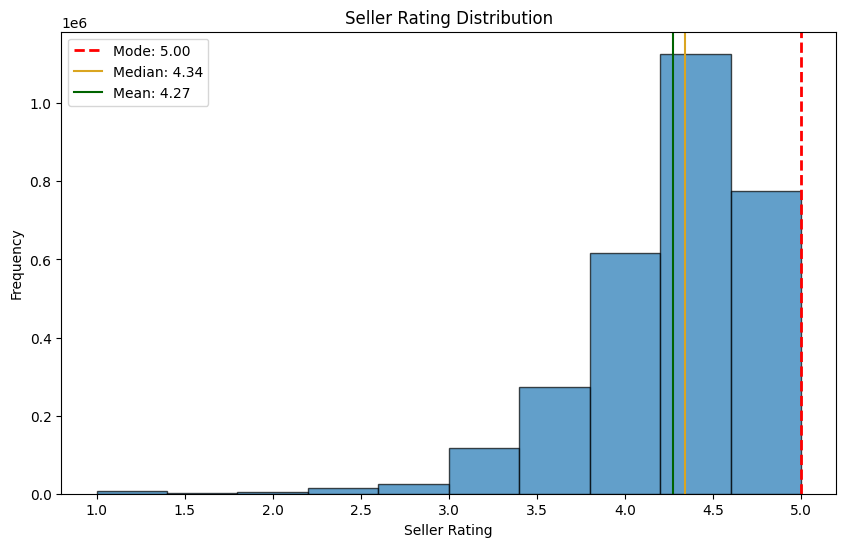

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Converting the column 'seller_rating' from Spark DataFrame to Pandas
seller_rating_pd_df = df.select('seller_rating').toPandas()

# Dropping null values for accurate plotting
seller_rating_pd_df = seller_rating_pd_df.dropna()

# Calculating mode, median, and mean
mode_seller_rating = seller_rating_pd_df['seller_rating'].mode()[0]
median_seller_rating = seller_rating_pd_df['seller_rating'].median()
mean_seller_rating = seller_rating_pd_df['seller_rating'].mean()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(seller_rating_pd_df['seller_rating'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Seller Rating Distribution")

# Adding mean,median and mode to the plot
plt.axvline(mode_seller_rating, color='r', linestyle='dashed', linewidth=2, label=f'Mode: {mode_seller_rating:.2f}')
plt.axvline(median_seller_rating, color='goldenrod', label=f'Median: {median_seller_rating:.2f}')
plt.axvline(mean_seller_rating, color='darkgreen', label=f'Mean: {mean_seller_rating:.2f}')

# Adding legend & Labeling the  axes
plt.legend()
plt.xlabel('Seller Rating')
plt.ylabel('Frequency')


plt.show()

In [ ]:
# Grouping by 'seller_rating' and count the occurrences
df.groupBy('seller_rating').count().orderBy('count', ascending=False).show()

+-------------+------+
|seller_rating| count|
+-------------+------+
|          5.0|189321|
|          4.0|122922|
|          4.5|106764|
|    4.6666665| 61967|
|    4.3333335| 59993|
|         4.75| 42888|
|         NULL| 40872|
|         4.25| 39789|
|          4.6| 35490|
|          4.8| 34807|
|          4.2| 33088|
|          4.4| 32209|
|     4.285714| 29500|
|     4.571429| 28384|
|    4.8333335| 28044|
|    3.6666667| 25260|
|     4.428571| 25173|
|          3.0| 24466|
|        4.375| 23410|
|          3.5| 22768|
+-------------+------+
only showing top 20 rows



In [ ]:
from pyspark.sql import functions as F

# Calculating total rows to compute percentages later
total_rows = df.count()

# Binning the 'seller_rating' column into 5-star categories
df = df.withColumn(
    "seller_rating_binned",
    F.when((F.col("seller_rating") >= 0) & (F.col("seller_rating") < 1), "1 star")
     .when((F.col("seller_rating") >= 1) & (F.col("seller_rating") < 2), "2 stars")
     .when((F.col("seller_rating") >= 2) & (F.col("seller_rating") < 3), "3 stars")
     .when((F.col("seller_rating") >= 3) & (F.col("seller_rating") < 4), "4 stars")
     .when((F.col("seller_rating") >= 4) & (F.col("seller_rating") <= 5), "5 stars")
)

# Grouping by the binned ratings and counting
rating_counts = df.groupBy("seller_rating_binned").count()

# Calculating percentage for each bin
rating_counts_with_percentage = rating_counts.withColumn(
    "percentage",
    F.round((F.col("count") / total_rows) * 100, 2)
)

# Ordering by count ro show the result
rating_counts_with_percentage.orderBy("count", ascending=False).show()


+--------------------+-------+----------+
|seller_rating_binned|  count|percentage|
+--------------------+-------+----------+
|             5 stars|2331205|     77.71|
|             4 stars| 575442|     19.18|
|             3 stars|  43381|      1.45|
|                NULL|  40872|      1.36|
|             2 stars|   9140|       0.3|
+--------------------+-------+----------+



Replacing null values in the `seller_rating` column with the mode, which is **5 stars**, is a logical approach because it represents the most common rating, covering nearly 78% of the data. This ensures that the replacement is aligned with the majority of the observations, minimizing bias and maintaining consistency. Since `5 stars` is overwhelmingly dominant, it is a reasonable assumption for missing values, preserving the integrity of the data distribution.

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'seller_rating' column BEFORE handling nulls
null_percentage_before = df.filter(F.col('seller_rating').isNull()).count() / total_rows * 100
print(f"Null values in 'seller_rating' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Filling null values in 'seller_rating' with the mode value '5 stars'
df = df.fillna({'seller_rating': 5.0})

# Calculating the percentage of remaining null values in the 'seller_rating' column AFTER filling
null_percentage_after = df.filter(F.col('seller_rating').isNull()).count() / total_rows * 100
print(f"Null values in 'seller_rating' column AFTER handling (replacing null values with 5 stars): {round(null_percentage_after, 2)} %.")


Null values in 'seller_rating' column BEFORE handling: 1.36 %.
Null values in 'seller_rating' column AFTER handling (replacing null values with 5 stars): 0.0 %.


In [ ]:
df = df.drop('seller_rating_binned')

#### **engine_displacement**

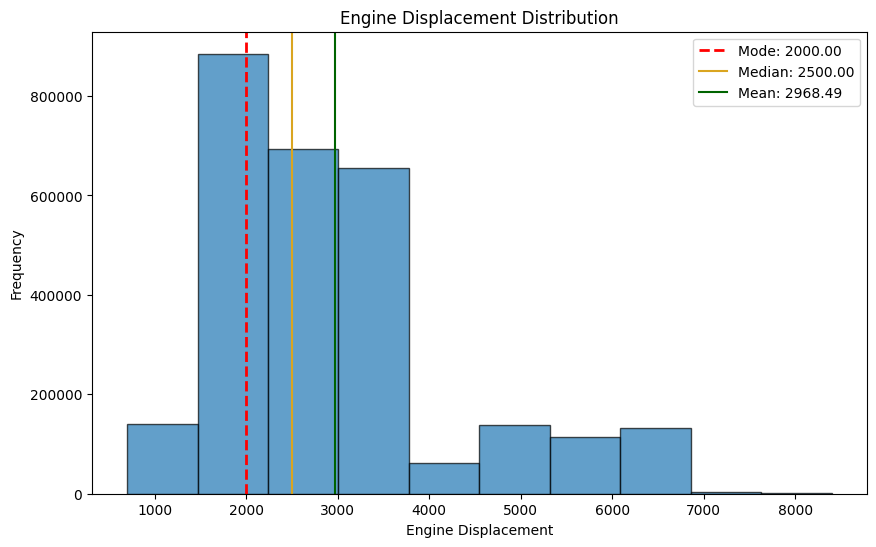

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import functions as F

# Collecting the 'engine_displacement' column as a Pandas DataFrame
engine_displacement_pd_df = df.select('engine_displacement').toPandas()

# Dropping null values for accurate plotting
engine_displacement_pd_df = engine_displacement_pd_df.dropna()

# Calculating mode, median, and mean
mode_engine_displacement = engine_displacement_pd_df['engine_displacement'].mode()[0]
median_engine_displacement = engine_displacement_pd_df['engine_displacement'].median()
mean_engine_displacement = engine_displacement_pd_df['engine_displacement'].mean()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(engine_displacement_pd_df['engine_displacement'], bins=10, edgecolor='black', alpha=0.7)
plt.title("Engine Displacement Distribution")

# Adding mean,median and mode to the plot
plt.axvline(mode_engine_displacement, color='r', linestyle='dashed', linewidth=2, label=f'Mode: {mode_engine_displacement:.2f}')
plt.axvline(median_engine_displacement, color='goldenrod', label=f'Median: {median_engine_displacement:.2f}')
plt.axvline(mean_engine_displacement, color='darkgreen', label=f'Mean: {mean_engine_displacement:.2f}')

# Adding legend & Labeling the  axes
plt.legend()
plt.xlabel('Engine Displacement')
plt.ylabel('Frequency')

plt.show()

Replacing null values in the `engine_displacement` column with the `median` is ideal because the median represents the middle value, making it less sensitive to outliers that could skew the data. By using the median, I ensure that the imputed values are more representative of the typical engine displacement in the dataset.

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'engine_displacement' column BEFORE handling nulls
null_percentage_before = df.filter(F.col('engine_displacement').isNull()).count() / total_rows * 100
print(f"Null values in 'engine_displacement' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Filling null values in 'engine_displacement' with the median value
df = df.fillna({'engine_displacement': median_engine_displacement})

# Calculating the percentage of remaining null values in the 'engine_displacement' column AFTER filling
null_percentage_after = df.filter(F.col('engine_displacement').isNull()).count() / total_rows * 100
print(f"Null values in 'engine_displacement' column AFTER handling (replacing null values with median {median_engine_displacement}): {round(null_percentage_after, 2)} %.")


Null values in 'engine_displacement' column BEFORE handling: 5.75 %.
Null values in 'engine_displacement' column AFTER handling (replacing null values with median 2500.0): 0.0 %.




---



## **Handling Categorical coloumns**

#### **Interior colors**

In [ ]:
# Converting the 'exterior_color' and 'interior_color' columns to lowercase
from pyspark.sql.functions import lower, col

df = df.withColumn('exterior_color', lower(col('exterior_color'))) \
       .withColumn('interior_color', lower(col('interior_color')))

In [ ]:
# Calculating the percentage of null values in the 'seller_rating' column BEFORE handling nulls
null_percentage_before = df.filter(F.col('interior_color').isNull()).count() / total_rows * 100
print(f"Null values in 'interior_color' column BEFORE handling: {round(null_percentage_before, 5)} %.")

Null values in 'interior_color' column BEFORE handling: 0.00017 %.


In [ ]:
# Calculating the percentage of null values in the 'seller_rating' column BEFORE handling nulls
null_percentage_before = df.filter(F.col('exterior_color').isNull()).count() / total_rows * 100
print(f"Null values in 'exterior_color' column BEFORE handling: {round(null_percentage_before, 5)} %.")

Null values in 'exterior_color' column BEFORE handling: 0.0 %.


so we see there are null values in exterior colors alone.

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Grouping by 'interior_color' and count occurrences
color_counts = df.groupBy('interior_color').count()

# Calculating percentage for each interior color
color_counts_with_percentage = color_counts.withColumn(
    "percentage",
    F.round((F.col("count") / total_rows) * 100, 5)  # Rounding to 5 decimal places for better precision
)

# Displaying the percentages in descending order
color_counts_with_percentage.orderBy(F.col("percentage").desc()).select("interior_color", "percentage").show()


+------------------+----------+
|    interior_color|percentage|
+------------------+----------+
|             black|  29.04605|
|              none|   12.7939|
|         jet black|   7.38623|
|              gray|   6.53018|
|     black (ebony)|   5.02777|
|  black (charcoal)|   4.20624|
|     brown (beige)|   1.59235|
| medium earth gray|   1.49135|
|       brown (tan)|   1.11872|
|    charcoal black|   0.84306|
|       titan black|   0.73899|
| diesel gray/black|   0.72096|
|          graphite|   0.61833|
|     white (ivory)|   0.57329|
|       ebony black|   0.53816|
|   medium ash gray|   0.50386|
|               ash|   0.46903|
|        light gray|   0.32396|
|medium light stone|   0.27803|
|   dark earth gray|   0.25943|
+------------------+----------+
only showing top 20 rows



I am replacing the null values in the `interior_color` column with **black**, as it represents 29.05% of the data, making it the most common and predominant value. Using the most frequent value helps maintain consistency and prevents the introduction of bias. Although 'none' accounts for 12.79%, it likely indicates missing or unspecified data rather than a valid color. Replacing with `black` provides a more meaningful and representative value for the dataset.

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Filling null values in 'interior_color' with the value 'black'
df = df.fillna({'interior_color': 'black'})

# Calculating the percentage of remaining null values in the 'interior_color' column AFTER filling
null_percentage_after = df.filter(F.col('interior_color').isNull()).count() / total_rows * 100
print(f"Null values in 'interior_color' column AFTER handling (replacing null values with black): {round(null_percentage_after, 2)} %.")


Null values in 'interior_color' column AFTER handling (replacing null values with black): 0.0 %.


#### **major_options**

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'major_options' column BEFORE handling nulls
null_percentage_before = df.filter(F.col('major_options').isNull()).count() / total_rows * 100
print(f"Null values in 'major_options' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Filling null values in 'major_options' with the value 'Unknown'
df = df.fillna({'major_options': 'Unknown'})

# Calculating the percentage of remaining null values in the 'major_options' column AFTER filling
null_percentage_after = df.filter(F.col('major_options').isNull()).count() / total_rows * 100
print(f"Null values in 'major_options' column AFTER handling (replacing null values with 'Unknown'): {round(null_percentage_after, 2)} %.")


Null values in 'major_options' column BEFORE handling: 6.67 %.
Null values in 'major_options' column AFTER handling (replacing null values with 'Unknown'): 0.0 %.


I am replacing null values in the `major_options` column with `'Unknown'` to ensure consistency and avoid losing data during analysis. This approach helps distinguish between missing information and actual values, allowing for better data integrity. By using `'Unknown'`, I retain all rows for further analysis while clearly marking the absence of specific major options.

In [ ]:
from pyspark.sql import functions as F

# Creating 'major_options_count' column by counting commas in 'major_options' and adding 1
df = df.withColumn(
    'major_options_count',
    F.when(F.col('major_options') == 'Unknown', 0)  # Set count to 0 if 'major_options' is 'Unknown'
     .otherwise(F.size(F.split(F.col('major_options'), ',')))  # Else, count commas and add 1
)

# Checking the result by counting the occurrences of each count (similar to value_counts in Pandas)
df.groupBy('major_options_count').count().orderBy('count', ascending=False).show()


+-------------------+------+
|major_options_count| count|
+-------------------+------+
|                  4|340507|
|                  3|314023|
|                  5|307013|
|                  6|282666|
|                  7|249405|
|                  8|225960|
|                  2|224622|
|                  0|200048|
|                  1|183391|
|                  9|183372|
|                 10|150294|
|                 11|115622|
|                 12| 80844|
|                 13| 51702|
|                 14| 32477|
|                 15| 18990|
|                 16| 12781|
|                 17|  8002|
|                 18|  5175|
|                 19|  3521|
+-------------------+------+
only showing top 20 rows



Setting the count of `major_options` as `'Unknown'` to `0` ensures accurate representation, reflecting that no known options are available, instead of misleadingly assigning a value of 1. This approach helps ensure the dataset accurately captures the absence of information.

In [ ]:
# Selecting 'major_options' and 'major_options_count' side by side
df_view = df.select( 'major_options_count','major_options')

# Showing the result
df_view.show(truncate=False)

+-------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|major_options_count|major_options                                                                                                                                                                                                                                          |
+-------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|9                  |['Sport Package', 'Sunroof/Moonroof', 'Navigation System', 'Alloy Wheels', 'Bluetooth', 'Backup Camera', 'Blind Spot Monitoring', 'Premium Package', 'Heated Seats']     

#### **description**

I am replacing null values in the `description` column with `'Unknown'` to ensure consistency and avoid losing data during analysis.

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'description' column BEFORE handling nulls
null_percentage_before = df.filter(F.col('description').isNull()).count() / total_rows * 100
print(f"Null values in 'description' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Filling null values in 'description' with the value 'Unknown'
df = df.fillna({'description': 'Unknown'})

# Calculating the percentage of remaining null values in the 'description' column AFTER filling
null_percentage_after = df.filter(F.col('description').isNull()).count() / total_rows * 100
print(f"Null values in 'description' column AFTER handling (replacing null values with 'Unknown'): {round(null_percentage_after, 2)} %.")


Null values in 'description' column BEFORE handling: 2.6 %.
Null values in 'description' column AFTER handling (replacing null values with 'Unknown'): 0.0 %.


#### **transmission**

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Grouping by 'transmission' column, count the occurrences, and calculating the rounded percentage
df_transmission_percentage = df.groupBy('transmission') \
    .count() \
    .withColumn('percentage', F.round((F.col('count') / total_rows) * 100, 2)) \
    .orderBy(F.col('percentage').desc())

# Showing the result
df_transmission_percentage.show(truncate=False)


+------------+-------+----------+
|transmission|count  |percentage|
+------------+-------+----------+
|A           |2418345|80.61     |
|CVT         |458016 |15.27     |
|NULL        |64185  |2.14      |
|M           |48425  |1.61      |
|Dual Clutch |11069  |0.37      |
+------------+-------+----------+



I replace the null values in the `transmission` column with **`A` (Automatic)** because it represents 80.61% of the data, making it the most common category. This replacement minimizes bias by aligning with the majority of the dataset. Given that automatic transmissions are dominant in modern vehicles, it’s a practical assumption for handling missing values.

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'transmission' column BEFORE handling nulls
null_percentage_before = df.filter(F.col('transmission').isNull()).count() / total_rows * 100
print(f"Null values in 'transmission' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Filling null values in 'transmission' with the value 'A' (Automatic)
df = df.fillna({'transmission': 'A'})

# Calculating the percentage of remaining null values in the 'transmission' column AFTER filling
null_percentage_after = df.filter(F.col('transmission').isNull()).count() / total_rows * 100
print(f"Null values in 'transmission' column AFTER handling (replacing null values with 'A'): {round(null_percentage_after, 2)} %.")


Null values in 'transmission' column BEFORE handling: 2.14 %.
Null values in 'transmission' column AFTER handling (replacing null values with 'A'): 0.0 %.


#### **body_type**

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'body_type' column BEFORE handling nulls
null_percentage_before = df.filter(F.col('body_type').isNull()).count() / total_rows * 100
print(f"Null values in 'body_type' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Filling null values in 'body_type' with the value 'Unknown'
df = df.fillna({'body_type': 'Unknown'})

# Calculating the percentage of remaining null values in the 'body_type' column AFTER filling
null_percentage_after = df.filter(F.col('body_type').isNull()).count() / total_rows * 100
print(f"Null values in 'body_type' column AFTER handling (replacing null values with 'Unknown'): {round(null_percentage_after, 2)} %.")


Null values in 'body_type' column BEFORE handling: 0.45 %.
Null values in 'body_type' column AFTER handling (replacing null values with 'Unknown'): 0.0 %.


#### **transmission_display**

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Grouping by 'transmission_display' column, counting the occurrences, and calculating the rounded percentage
df_transmission_display_percentage = df.groupBy('transmission_display') \
    .count() \
    .withColumn('percentage', F.round((F.col('count') / total_rows) * 100, 2)) \
    .orderBy(F.col('percentage').desc())

# Showing the result
df_transmission_display_percentage.show(truncate=False)


+----------------------------------+-------+----------+
|transmission_display              |count  |percentage|
+----------------------------------+-------+----------+
|Automatic                         |1255101|41.84     |
|Continuously Variable Transmission|454964 |15.17     |
|6-Speed Automatic                 |425544 |14.18     |
|8-Speed Automatic                 |333315 |11.11     |
|9-Speed Automatic                 |146622 |4.89      |
|6-Speed Automatic Overdrive       |88050  |2.93      |
|NULL                              |64185  |2.14      |
|7-Speed Automatic                 |44200  |1.47      |
|5-Speed Automatic                 |40504  |1.35      |
|4-Speed Automatic                 |36843  |1.23      |
|6-Speed Manual                    |21107  |0.7       |
|Manual                            |16866  |0.56      |
|8-Speed Automatic Overdrive       |12257  |0.41      |
|5-Speed Automatic Overdrive       |11996  |0.4       |
|1-Speed Automatic                 |8297   |0.28

Replacing null values in the `transmission_display` column with `Automatic` is advantageous because the combined percentage of all automatic transmission types amounts to approximately **76.63%** (41.84% for 'Automatic', 15.17% for 'Continuously Variable Transmission', 14.18% for '6-Speed Automatic', 11.11% for '8-Speed Automatic', and others). This substantial majority indicates that automatic transmissions are the most common type in the dataset. In contrast, replacing null values with **'Unknown'** would fail to leverage this significant information, potentially leading to inaccurate analyses and insights regarding vehicle transmission types.

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'transmission_display' column BEFORE handling nulls
null_percentage_before = df.filter(F.col('transmission_display').isNull()).count() / total_rows * 100
print(f"Null values in 'transmission_display' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Filling null values in 'transmission_display' with the value 'Automatic'
df = df.fillna({'transmission_display': 'Automatic'})

# Calculating the percentage of remaining null values in the 'transmission_display' column AFTER filling
null_percentage_after = df.filter(F.col('transmission_display').isNull()).count() / total_rows * 100
print(f"Null values in 'transmission_display' column AFTER handling (replacing null values with 'Automatic'): {round(null_percentage_after, 2)} %.")


Null values in 'transmission_display' column BEFORE handling: 2.14 %.
Null values in 'transmission_display' column AFTER handling (replacing null values with 'Automatic'): 0.0 %.


#### **wheel_system_display**



In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Grouping by 'wheel_system_display' column, count the occurrences, and calculate the rounded percentage
df_wheel_system_display_percentage = df.groupBy('wheel_system_display') \
    .count() \
    .withColumn('percentage', F.round((F.col('count') / total_rows) * 100, 2)) \
    .orderBy(F.col('percentage').desc())

# Showing the result
df_wheel_system_display_percentage.show(truncate=False)


+--------------------+-------+----------+
|wheel_system_display|count  |percentage|
+--------------------+-------+----------+
|Front-Wheel Drive   |1261367|42.05     |
|All-Wheel Drive     |695731 |23.19     |
|Four-Wheel Drive    |584524 |19.48     |
|Rear-Wheel Drive    |190757 |6.36      |
|NULL                |146732 |4.89      |
|4X2                 |120929 |4.03      |
+--------------------+-------+----------+



 I am replacing null values in the `wheel_system_display` with `Unknown` is a more better approach than replacing with **'Front-Wheel Drive'** in this case, because it indicates that the specific wheel system is not available, preserving the integrity of the data without making unwarranted assumptions. This way, I maintain a clear distinction between known and unknown values, which is crucial for accurate analysis.

In [ ]:
from pyspark.sql import functions as F

# Calculating the total number of rows in the DataFrame
total_rows = df.count()

# Calculating the percentage of null values in the 'wheel_system_display' column BEFORE handling nulls
null_percentage_before = df.filter(F.col('wheel_system_display').isNull()).count() / total_rows * 100
print(f"Null values in 'wheel_system_display' column BEFORE handling: {round(null_percentage_before, 2)} %.")

# Filling null values in 'wheel_system_display' with the value 'Unknown'
df = df.fillna({'wheel_system_display': 'Unknown'})

# Calculating the percentage of remaining null values in the 'wheel_system_display' column AFTER filling
null_percentage_after = df.filter(F.col('wheel_system_display').isNull()).count() / total_rows * 100
print(f"Null values in 'wheel_system_display' column AFTER handling (replacing null values with 'Unknown'): {round(null_percentage_after, 2)} %.")


Null values in 'wheel_system_display' column BEFORE handling: 4.89 %.
Null values in 'wheel_system_display' column AFTER handling (replacing null values with 'Unknown'): 0.0 %.




---



In [ ]:
from functools import reduce
from pyspark.sql.functions import col

# Checking for rows with at least one null value in any column
rows_with_null = df.filter(
    reduce(lambda x, y: x | y, (col(c).isNull() for c in df.columns))).count()

print(f"Number of rows with at least one null value: {rows_with_null}")

Number of rows with at least one null value: 0


In [ ]:
import pandas as pd
from pyspark.sql import functions as F
from pyspark.sql.window import Window

pd.set_option('display.max_columns', None)

# Calculating the null percentage for each column (keep it as float for now)
null_percentage_calculate_df = df.select(
    [(F.sum(F.when(F.col(c).isNull(), 1).otherwise(0)) / F.count(F.lit(1)) * 100).alias(c) for c in df.columns]
)

# Using explode and creating a map of column names and their null percentages, then casting to int
null_percentage_display_df = null_percentage_calculate_df.select(
    F.explode(
        F.map_from_arrays(
            F.array([F.lit(c) for c in df.columns]),
            F.array([F.col(c).cast("int") for c in null_percentage_calculate_df.columns])  # Casting percentages to integer
        )
    ).alias("Column Name", "Null Percentage")
)

# Creating a row index (1-based) and add it to the DataFrame
window_spec = Window.orderBy(F.lit(1))
null_percentage_display_df = null_percentage_display_df.withColumn("Index", F.row_number().over(window_spec))
null_percentage_display_df = null_percentage_display_df.select("Index", "Column Name", "Null Percentage")

# Getting the total number of rows in the reshaped DataFrame
total_rows = null_percentage_display_df.count()

# Displaying all rows with index without truncation
null_percentage_display_df.show(total_rows, truncate=False)

# Deleting the DataFrame from the local namespace
del null_percentage_display_df
_ = gc.collect()


+-----+---------------------+---------------+
|Index|Column Name          |Null Percentage|
+-----+---------------------+---------------+
|1    |fuel_type            |0              |
|2    |body_type            |0              |
|3    |city                 |0              |
|4    |city_fuel_economy    |0              |
|5    |daysonmarket         |0              |
|6    |dealer_zip           |0              |
|7    |description          |0              |
|8    |engine_displacement  |0              |
|9    |engine_type          |0              |
|10   |exterior_color       |0              |
|11   |franchise_dealer     |0              |
|12   |fuel_tank_volume     |0              |
|13   |height               |0              |
|14   |highway_fuel_economy |0              |
|15   |horsepower           |0              |
|16   |interior_color       |0              |
|17   |is_new               |0              |
|18   |latitude             |0              |
|19   |length               |0    

In [ ]:
# Setting Spark broadcast timeout for larger datasets
spark.conf.set("spark.sql.broadcastTimeout", "600")

# Coalescing into a single partition (to write as a single file)
df_single_partition = df.coalesce(1)

# Defining the path in Google Drive where the DataFrame will be saved as a Parquet file
output_path = '/content/drive/MyDrive/Big Data Analytics - Project/Datasets/Processed_DF.parquet'

# Writing the DataFrame as a Parquet file in the specified Google Drive location
df_single_partition.write.format("parquet") \
    .mode("overwrite") \
    .save(output_path)

print("DataFrame has been saved as a single Parquet file in Google Drive.")

DataFrame has been saved as a single Parquet file in Google Drive.




---

